### Problem Statment 

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
**Problem Statement:** 

a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Rainfall%20Forecast/Rainfall.csv')

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
8424,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [5]:
df.shape

(8425, 23)

In [6]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

- The rainfall weather forecasting dataset comprises 8425 rows and 23 columns, containing both numerical and categorical values.
-  we will employ both regression and classification techniques, using 21 columns as independent variables and 2 columns as target variables.

### Data Explotory Analysis(EDA)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

**From above we can observed that**
- The dataset's index values range from 0 to 8424, covering 8425 rows 
- There are two type of data type present 'float' and 'object'
- There are missing value present in dataset.

### Checking Nan,Null,Other and handling

In [8]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [9]:
for i in df.columns:
    print(i,df[i].unique(),'\n')

Date ['2008-12-01' '2008-12-02' '2008-12-03' ... '2013-06-06' '2013-06-07'
 '2013-06-08'] 

Location ['Albury' 'CoffsHarbour' 'Newcastle' 'Penrith' 'Williamtown' 'Wollongong'
 'Melbourne' 'Brisbane' 'Adelaide' 'PerthAirport' 'Darwin' 'Uluru'] 

MinTemp [13.4  7.4 12.9  9.2 17.5 14.6 14.3  7.7  9.7 13.1 15.9 12.6  8.4  9.8
 14.1 13.5 11.2 11.5 17.1 20.5 15.3 16.2 16.9 20.1 19.7 12.5 12.  11.3
  9.6 10.5 12.3 13.7 16.1 14.  17.  17.3 17.2 17.4 19.8 14.9 13.9 18.6
 19.3 24.4 18.8 20.8 15.7 18.5 20.4 21.8 22.3 22.  28.  21.5 21.7 23.5
 28.3 18.4 12.4 13.3 18.  18.7 15.5  8.9 15.  15.4 16.  12.8 13.2 13.8
  7.6  8.3 11.  20.9 16.4 10.   8.8  9.3 14.4 10.8 10.1  9.1 10.4 12.2
 10.7  7.8  8.1  7.5  8.2 11.6 13.   9.9  3.5  6.6  7.   5.7  6.2  6.
 10.6  8.6  4.5  5.4  2.1  1.8  7.2  4.6  4.2  5.2  4.1  3.2  4.3  3.7
  3.6  6.9 10.3  3.   2.6  5.1  4.4  4.7  6.7  8.   2.2  1.7  2.8  9.
  6.3 -2.  -1.3  2.   0.5  1.2  0.6  0.9  5.   3.9  3.4  0.  -1.5 -1.7
 -0.4  0.1  4.8  5.9  2.9 -0.6 -0.3 -1.

We analyze unique value  in each columns

#### Handling Nan values

In [10]:
list=['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed3pm','WindSpeed9am','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']
for i in list:
    df[i]=df[i].fillna(df[i].mean())

Replaced Nan values with mean value

In [11]:
list2=['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']
for i in list2:
    df[i]=df[i].fillna(df[i].mode()[0])

Replace Nan values with mode value

In [12]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [13]:
#importing the date time
from datetime import datetime
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d')

In [14]:
df['Year']=df['Date'].dt.year

In [15]:
df['Day']=df['Date'].dt.date

In [16]:
df['Month']=df['Date'].dt.month

In [17]:
df.drop('Date',axis=1,inplace=True)

Completed Exploratory Data Analysis (EDA), we are now proceeding to the data visualization phase

### Data Visulazation

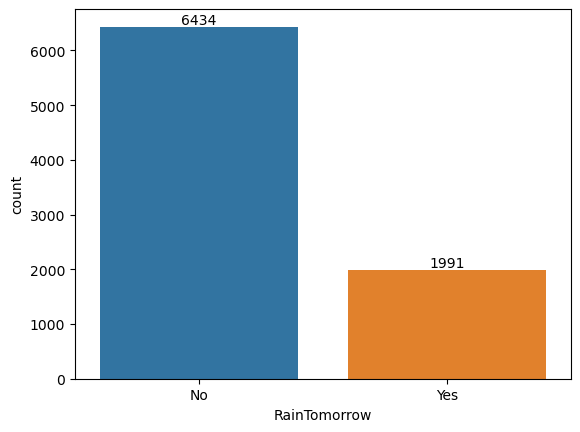

In [301]:
ax=sns.countplot(data=df,x='RainTomorrow')
for bar in ax.containers:
    ax.bar_label(bar)

From the graph above,it is evident that the count of 'NO' in Rain Tomorrow significantly exceeds that of 'YES'. This indicates a class imbalance issue

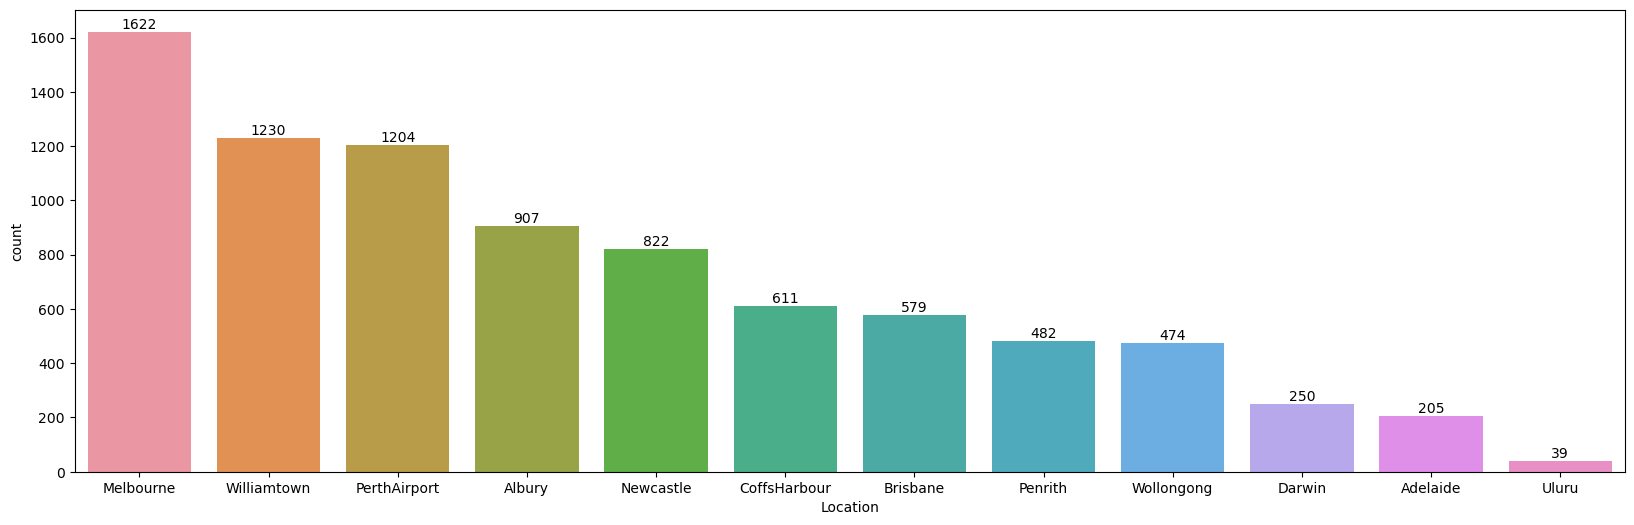

In [302]:
plt.figure(figsize=(20,6))
counts=df['Location'].value_counts().sort_values(ascending=False)
ax=sns.countplot(data=df,x='Location',order=counts.index)
for bar in ax.containers:
    ax.bar_label(bar)

From the above graph, we can observe that the count for the 'Melbourne' location is higher compared to all other locations.

Text(0.5, 1.0, 'Rain Tomorrow Analysis:Location')

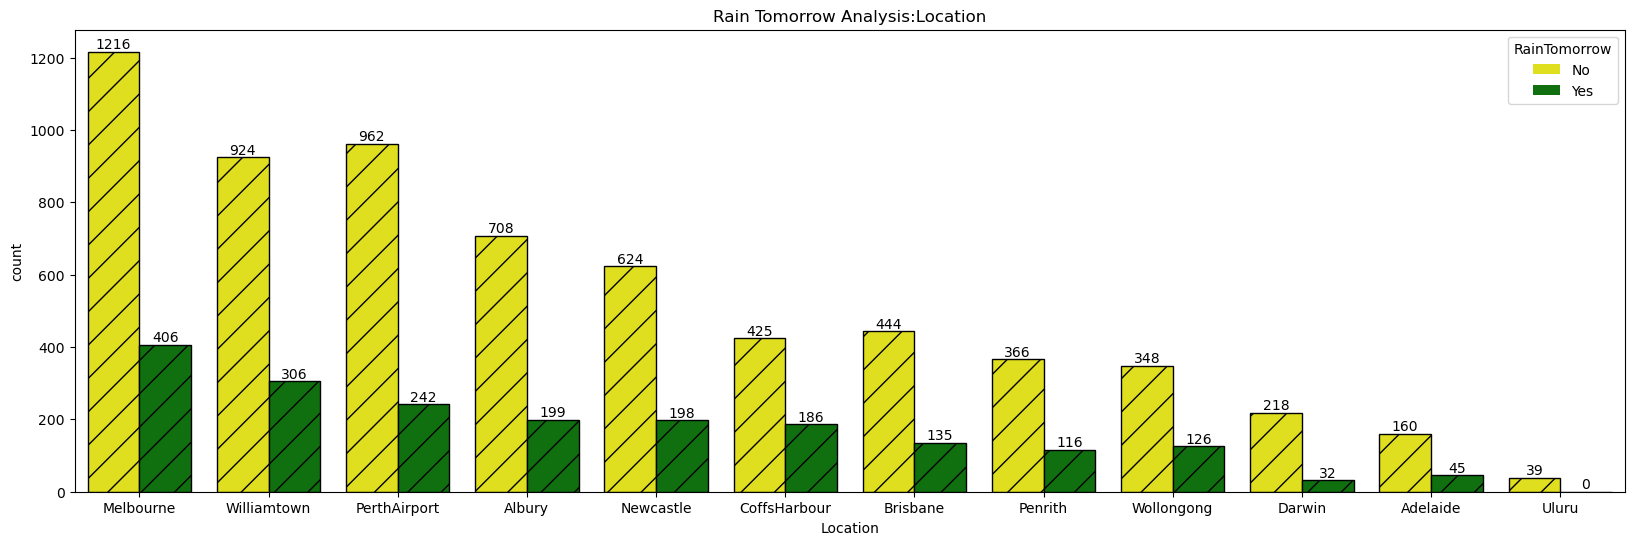

In [303]:
plt.figure(figsize=(20,6))
custom_palette=['Yellow','Green']
counts=df['Location'].value_counts().sort_values(ascending=False)
ax=sns.countplot(data=df,x='Location',hue='RainTomorrow',order=counts.index,palette=custom_palette)
for bar in ax.containers:
    ax.bar_label(bar)
for bar in ax.patches:
    bar.set_hatch('/')
    bar.set_edgecolor('black')
ax.set_title('Rain Tomorrow Analysis:Location')    

**From the graph above**


1. **Melbourne Dominates in Data**: Melbourne has the highest number of observations and a significant count of both dry and rainy days, highlighting its extensive weather data collection.
   
2. **Disparity in Rain Occurrences**: Locations like Williamtown and PerthAirport show a high number of dry days compared to rainy days, whereas Uluru records no rainy days, reflecting its arid climate.

3. **Variability in Data Availability**: While major cities and airports like Melbourne, Williamtown, and PerthAirport have substantial data points, remote locations like Uluru have limited data, indicating variability in data availability across different regions.

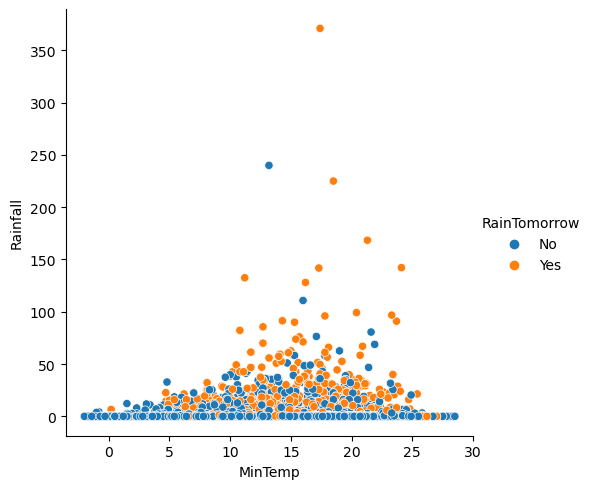

In [304]:
sns.relplot(x='MinTemp',y='Rainfall',hue='RainTomorrow',data=df)

**From above graph we can observed that**
- Trend: Most data points are clustered around lower to mid-range minimum temperatures (5-20°C).
- RainTomorrow: Both "No" and "Yes" cases are spread across the temperature range, though higher minimum temperatures (>20°C) show slightly more cases of rainfall the next day.
- Insight: While there is a concentration of rainfall occurrences at certain temperature ranges, minimum temperature alone does not seem to be a strong predictor for rainfall

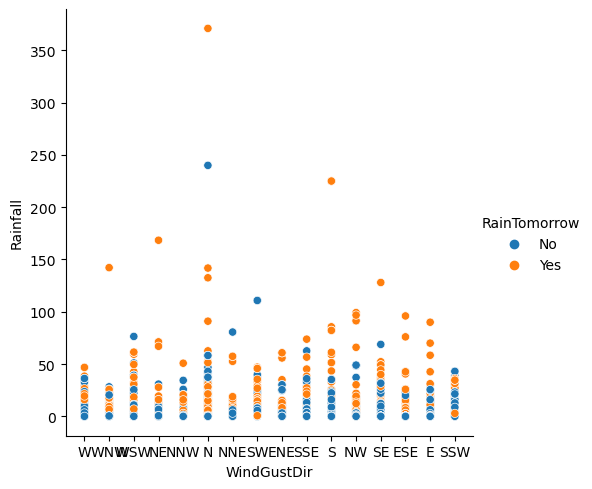

In [168]:
sns.relplot(x='WindGustDir',y='Rainfall',hue='RainTomorrow',data=df)

**From above graph we can observed**
- Trend: Rainfall does not show a clear pattern with wind gust direction.
- RainTomorrow: Both "No" and "Yes" cases are evenly spread across various wind gust directions.
- Insight: Wind gust direction does not appear to significantly affect whether it will rain tomorrow, as the rainfall distribution is relatively uniform across all directions.

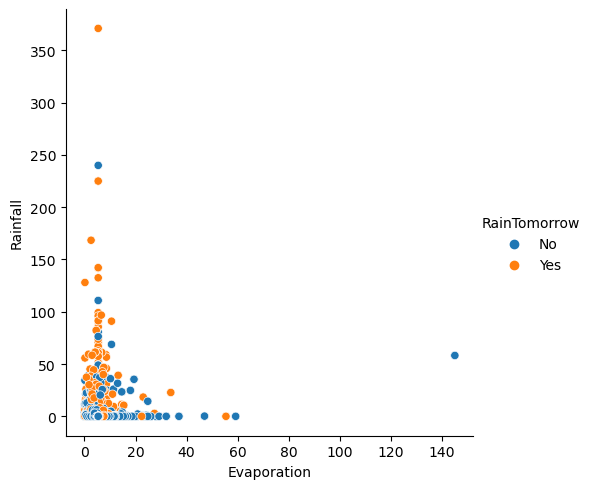

In [169]:
sns.relplot(x='Evaporation',y='Rainfall',hue='RainTomorrow',data=df)

**From above Graph we can observed that**
- Trend: Most data points are clustered at lower evaporation values with a rapid decrease in rainfall as evaporation increases.
- RainTomorrow: Both "No" and "Yes" cases are mixed together at lower evaporation values. High evaporation values (>50) tend to be associated with no rainfall the next day.
- Insight: There seems to be an inverse relationship between rainfall and evaporation, with higher evaporation correlating with lower rainfall.

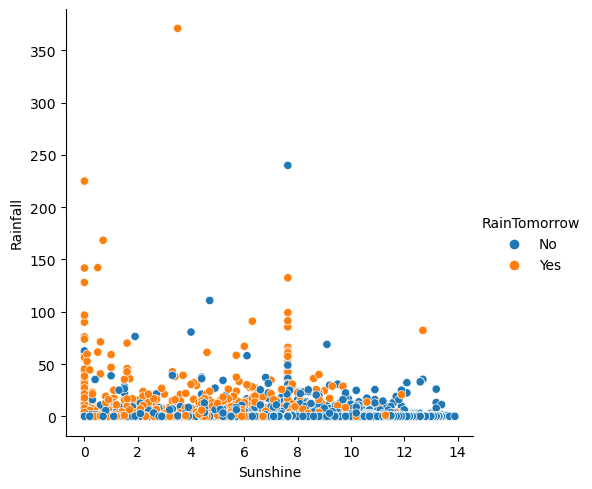

In [170]:
sns.relplot(x='Sunshine',y='Rainfall',hue='RainTomorrow',data=df)

**From above graph we can observed that**
- Trend: There is no clear linear relationship between rainfall and sunshine.
- RainTomorrow: Both "No" and "Yes" cases are scattered across various sunshine levels, but higher rainfall values are more sparsely populated.
- Insight: Rainfall seems to occur regardless of the amount of sunshine, though heavy rainfall (>50) tends to happen with lower sunshine values

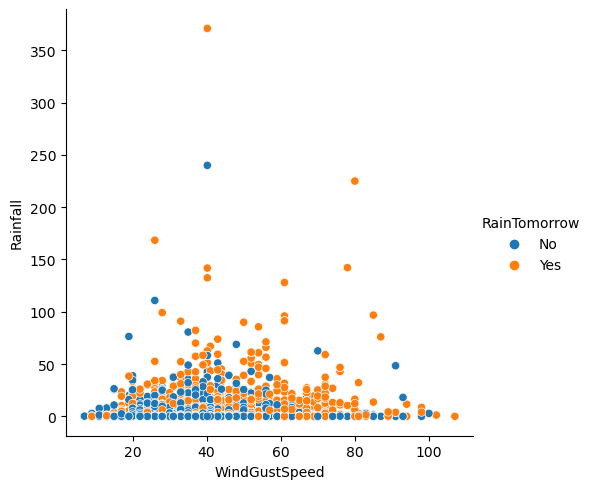

In [171]:
sns.relplot(x='WindGustSpeed',y='Rainfall',hue='RainTomorrow',data=df)

**From above graph we can observed that**
- Trend: Most data points are clustered at lower wind gust speeds, with rainfall decreasing as wind gust speed increases.
- RainTomorrow: Both "No" and "Yes" cases are mixed at lower wind gust speeds, but higher wind gust speeds (>80) predominantly indicate no rainfall the next day.
- Insight: There seems to be a slight trend where higher wind gust speeds are associated with lower rainfall, but this is not very pronounced.

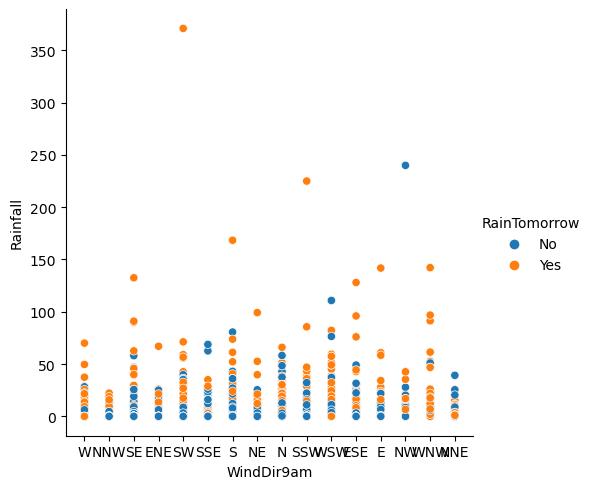

In [172]:
sns.relplot(x='WindDir9am',y='Rainfall',hue='RainTomorrow',data=df)

**From above graph we can observation**
- Trend: Rainfall is distributed across all wind directions at 9 am without a clear pattern.
- RainTomorrow: Both "No" and "Yes" cases are interspersed among various wind directions.
- Insight: Similar to WindGustDir, WindDir9am does not exhibit a strong influence on rainfall patterns. The distribution of "No" and "Yes" cases is fairly uniform across wind directions.

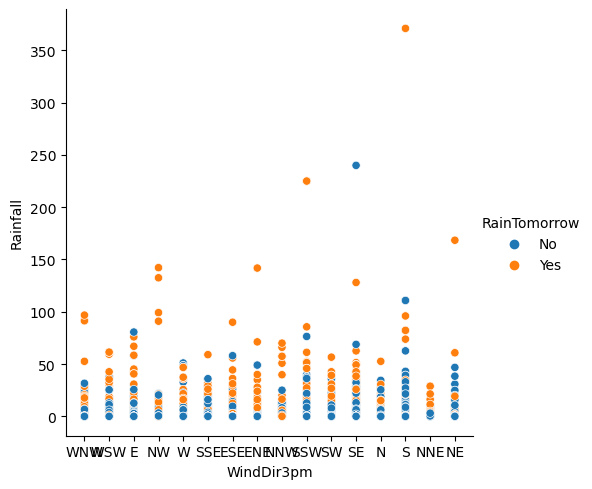

In [173]:
sns.relplot(x='WindDir3pm',y='Rainfall',hue='RainTomorrow',data=df)

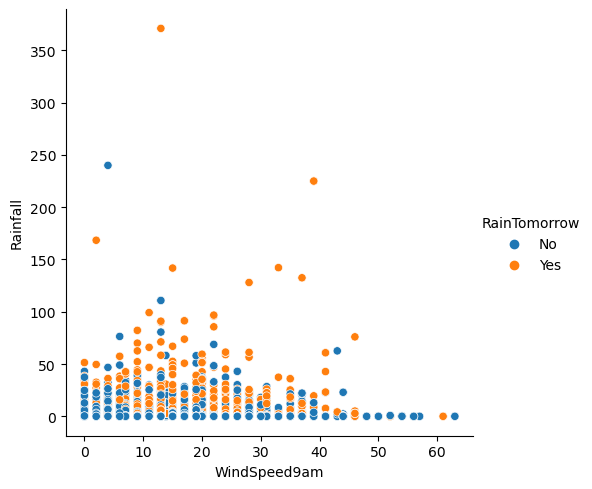

In [174]:
sns.relplot(x='WindSpeed9am',y='Rainfall',hue='RainTomorrow',data=df)

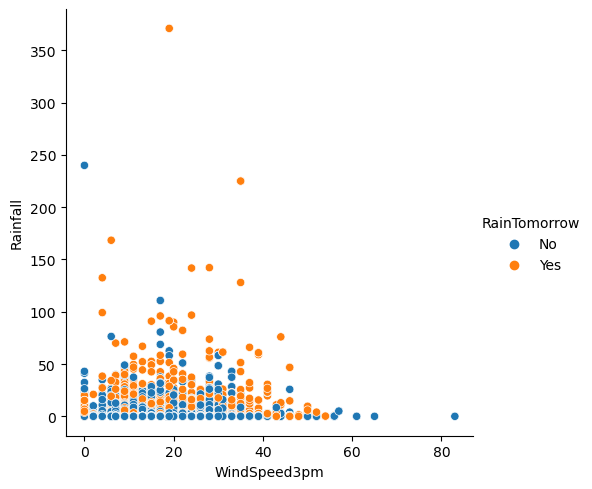

In [175]:
sns.relplot(x='WindSpeed3pm',y='Rainfall',hue='RainTomorrow',data=df)

**From above graph we can observed that**
- Most rainfall events occur at lower wind speeds at 3pm.
- Higher wind speeds are not strongly associated with higher rainfall.

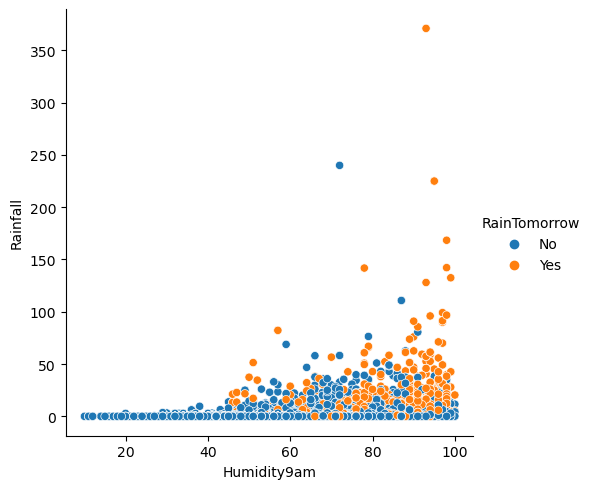

In [176]:
sns.relplot(x='Humidity9am',y='Rainfall',hue='RainTomorrow',data=df)

**From above graph we can observed that**
- Higher humidity at 9am is associated with higher rainfall.
- Rainfall events are more frequent and intense at higher humidity levels.

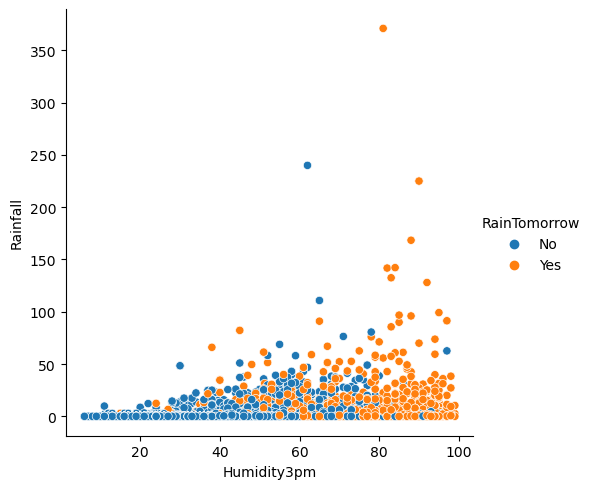

In [177]:
sns.relplot(x='Humidity3pm',y='Rainfall',hue='RainTomorrow',data=df)

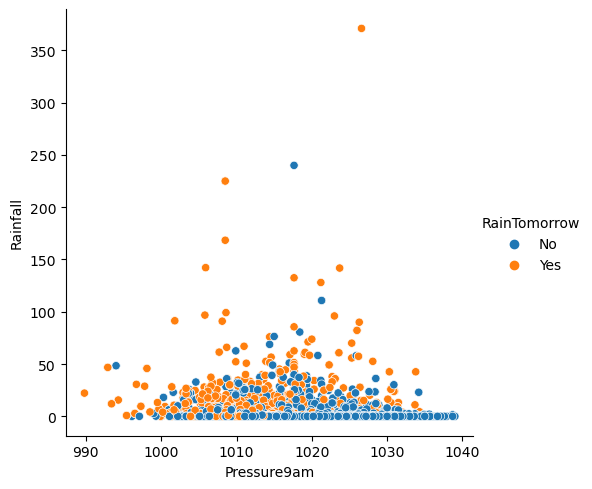

In [178]:
sns.relplot(x='Pressure9am',y='Rainfall',hue='RainTomorrow',data=df)

- There appears to be a tendency for higher rainfall today to correlate with rain tomorrow, but this is not a strict rule as there are blue points (no rain tomorrow) with high rainfall values.
- Pressure at 9am does not show a strong visual correlation with whether it will rain tomorrow, as points are scattered across the entire range of pressures for both categories of rain tomorrow.

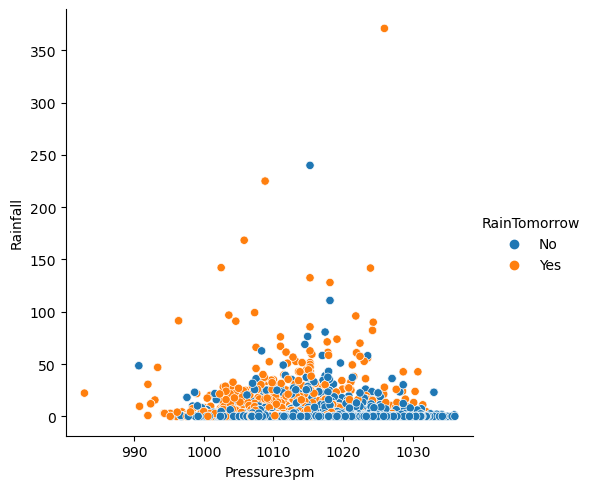

In [179]:
sns.relplot(x='Pressure3pm',y='Rainfall',hue='RainTomorrow',data=df)

- The density of points suggests a slight increase in rainfall as pressure decreases, but this trend is not very strong.
- High atmospheric pressure does not show a significant increase in predicting no rain the next day, as both Yes and No are represented across the entire range of pressure values.

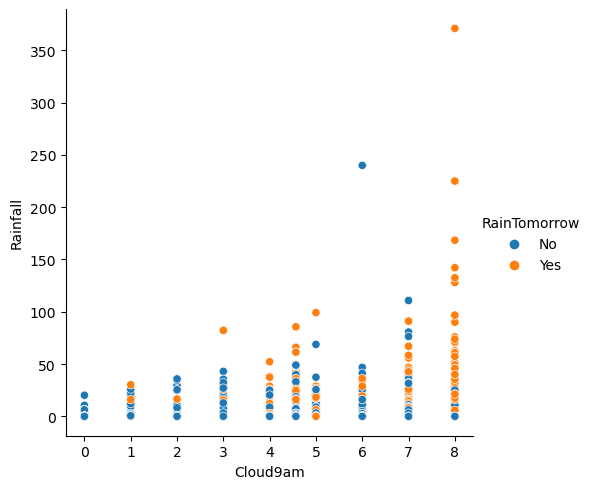

In [180]:
sns.relplot(x='Cloud9am',y='Rainfall',hue='RainTomorrow',data=df)

There is a trend suggesting that as cloud cover at 9 AM increases, there is a higher likelihood of rain the next day, indicated by the increased density of orange points at higher cloud cover values.

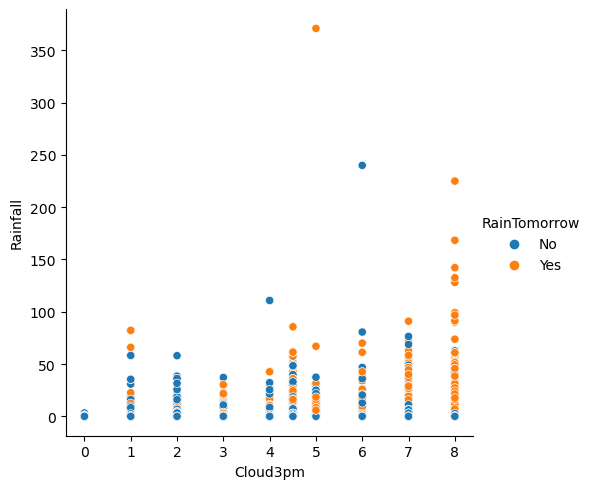

In [181]:
sns.relplot(x='Cloud3pm',y='Rainfall',hue='RainTomorrow',data=df)

The trend suggests that as cloud cover at 3 PM increases, there is a higher likelihood of rain the next day, as indicated by the increased density of orange points at higher cloud cover values.

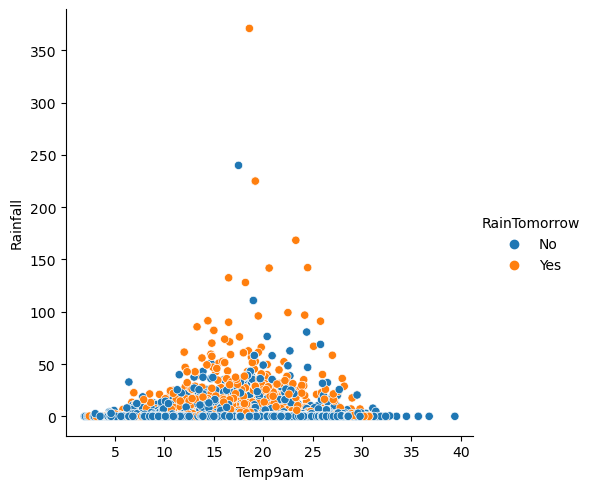

In [182]:
sns.relplot(x='Temp9am',y='Rainfall',hue='RainTomorrow',data=df)

**From above graph we can observed that**
- Temperature Correlation: Rainfall tends to be clustered around certain temperature ranges, particularly between 15-25°C.
- Rain Tomorrow: Both categories "Yes" and "No" are present across the temperature range, with slightly more rainfall associated with moderate temperatures.

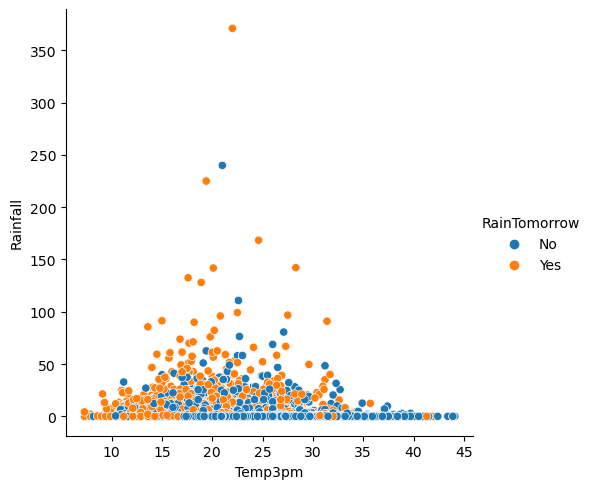

In [183]:
sns.relplot(x='Temp3pm',y='Rainfall',hue='RainTomorrow',data=df)

**From above graph we can observed that**
- Temperature Correlation: Similar to the 9 AM temperature, rainfall is mostly clustered around 15-25°C.
- Rain Tomorrow: Distribution of rainfall tomorrow is similar for temperatures recorded at 3 PM, with a slight inclination towards moderate temperatures.

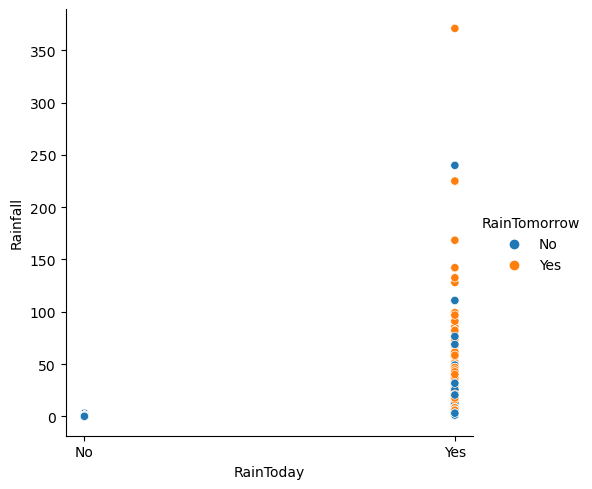

In [184]:
sns.relplot(x='RainToday',y='Rainfall',hue='RainTomorrow',data=df)

**From above graph we can observed that**
- Rainfall Distribution: There's a clear distinction in rainfall amount between days when it rains today and when it does not.
- Rain Tomorrow: When it rains today, there is a higher likelihood of rain tomorrow, indicated by more orange dots

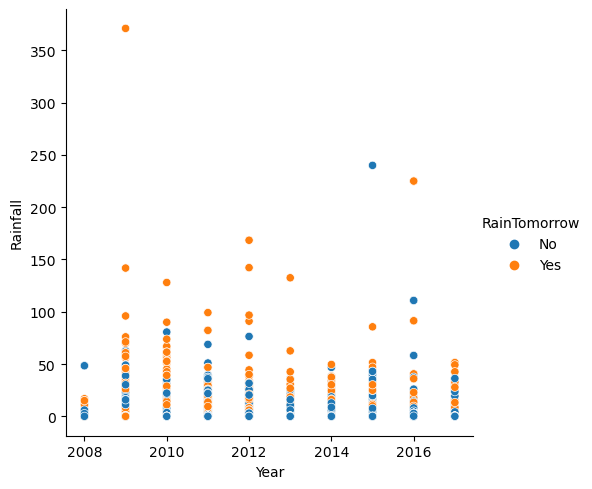

In [185]:
sns.relplot(x='Year',y='Rainfall',hue='RainTomorrow',data=df)

**From above graph we can observed that**
- There is a fairly even distribution of rainfall events across the years from 2008 to 2016.
- No particular year stands out as having significantly more or less rainfall.

**From above graph we can observed that**
1. **Overall Trend**: The rainfall exhibits a generally declining trend from 2008 to 2014, followed by an increasing trend from 2014 to 2017.

2. **Initial Increase**: There is a slight increase in rainfall from 2008 to 2009.

3. **Decline**: From 2009 to 2014, there is a noticeable decline in rainfall.

4. **Sharp Increase**: A sharp increase in rainfall is observed between 2014 and 2015.

5. **Post-Increase Stability**: After the sharp increase, rainfall shows a gradual increasing trend from 2015 to 2017, though it is less pronounced than the previous increase.

6. **Uncertainty Range**: The shaded area around the line indicates the range of uncertainty or variability in the rainfall data. This range is wider in some years, suggesting higher variability or less certainty in the measurements during those periods. Notably, the uncertainty is larger in 2008-2009 and 2014-2015.

#### Checking Distribution of data

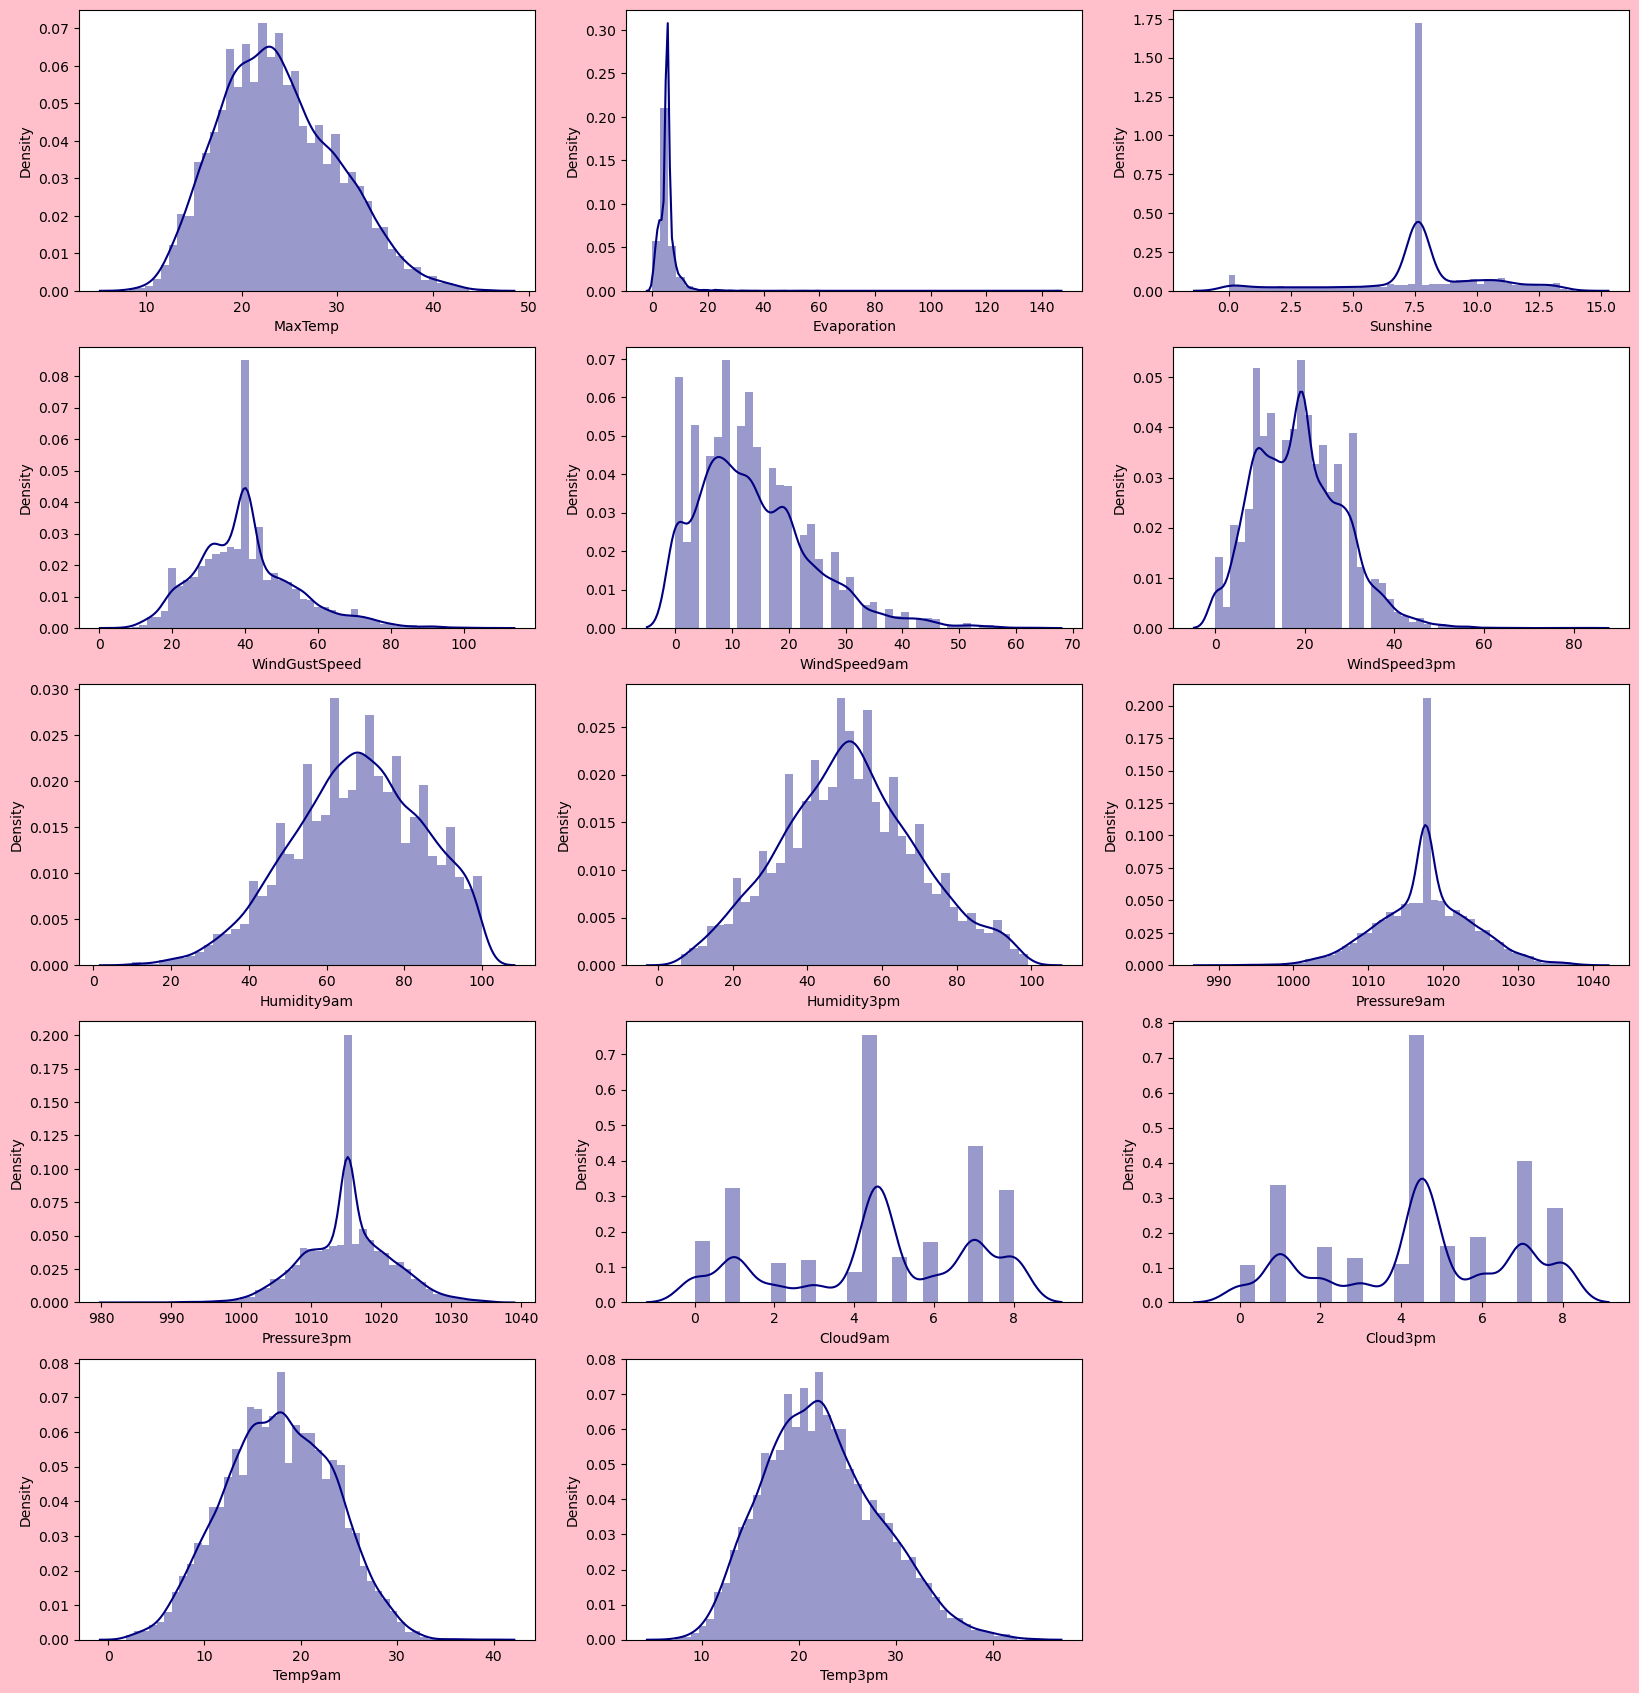

In [187]:
plt.figure(figsize=(20,100),facecolor='pink')
count=1
list=['MaxTemp','Evaporation',
       'Sunshine', 'WindGustSpeed', 
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']
for i in list:
    if count<=25:
        ax=plt.subplot(23,3,count)
        sns.distplot(df[i],color='navy')
        plt.xlabel(i)
    count+=1
plt.show()

#### Checking Outliers

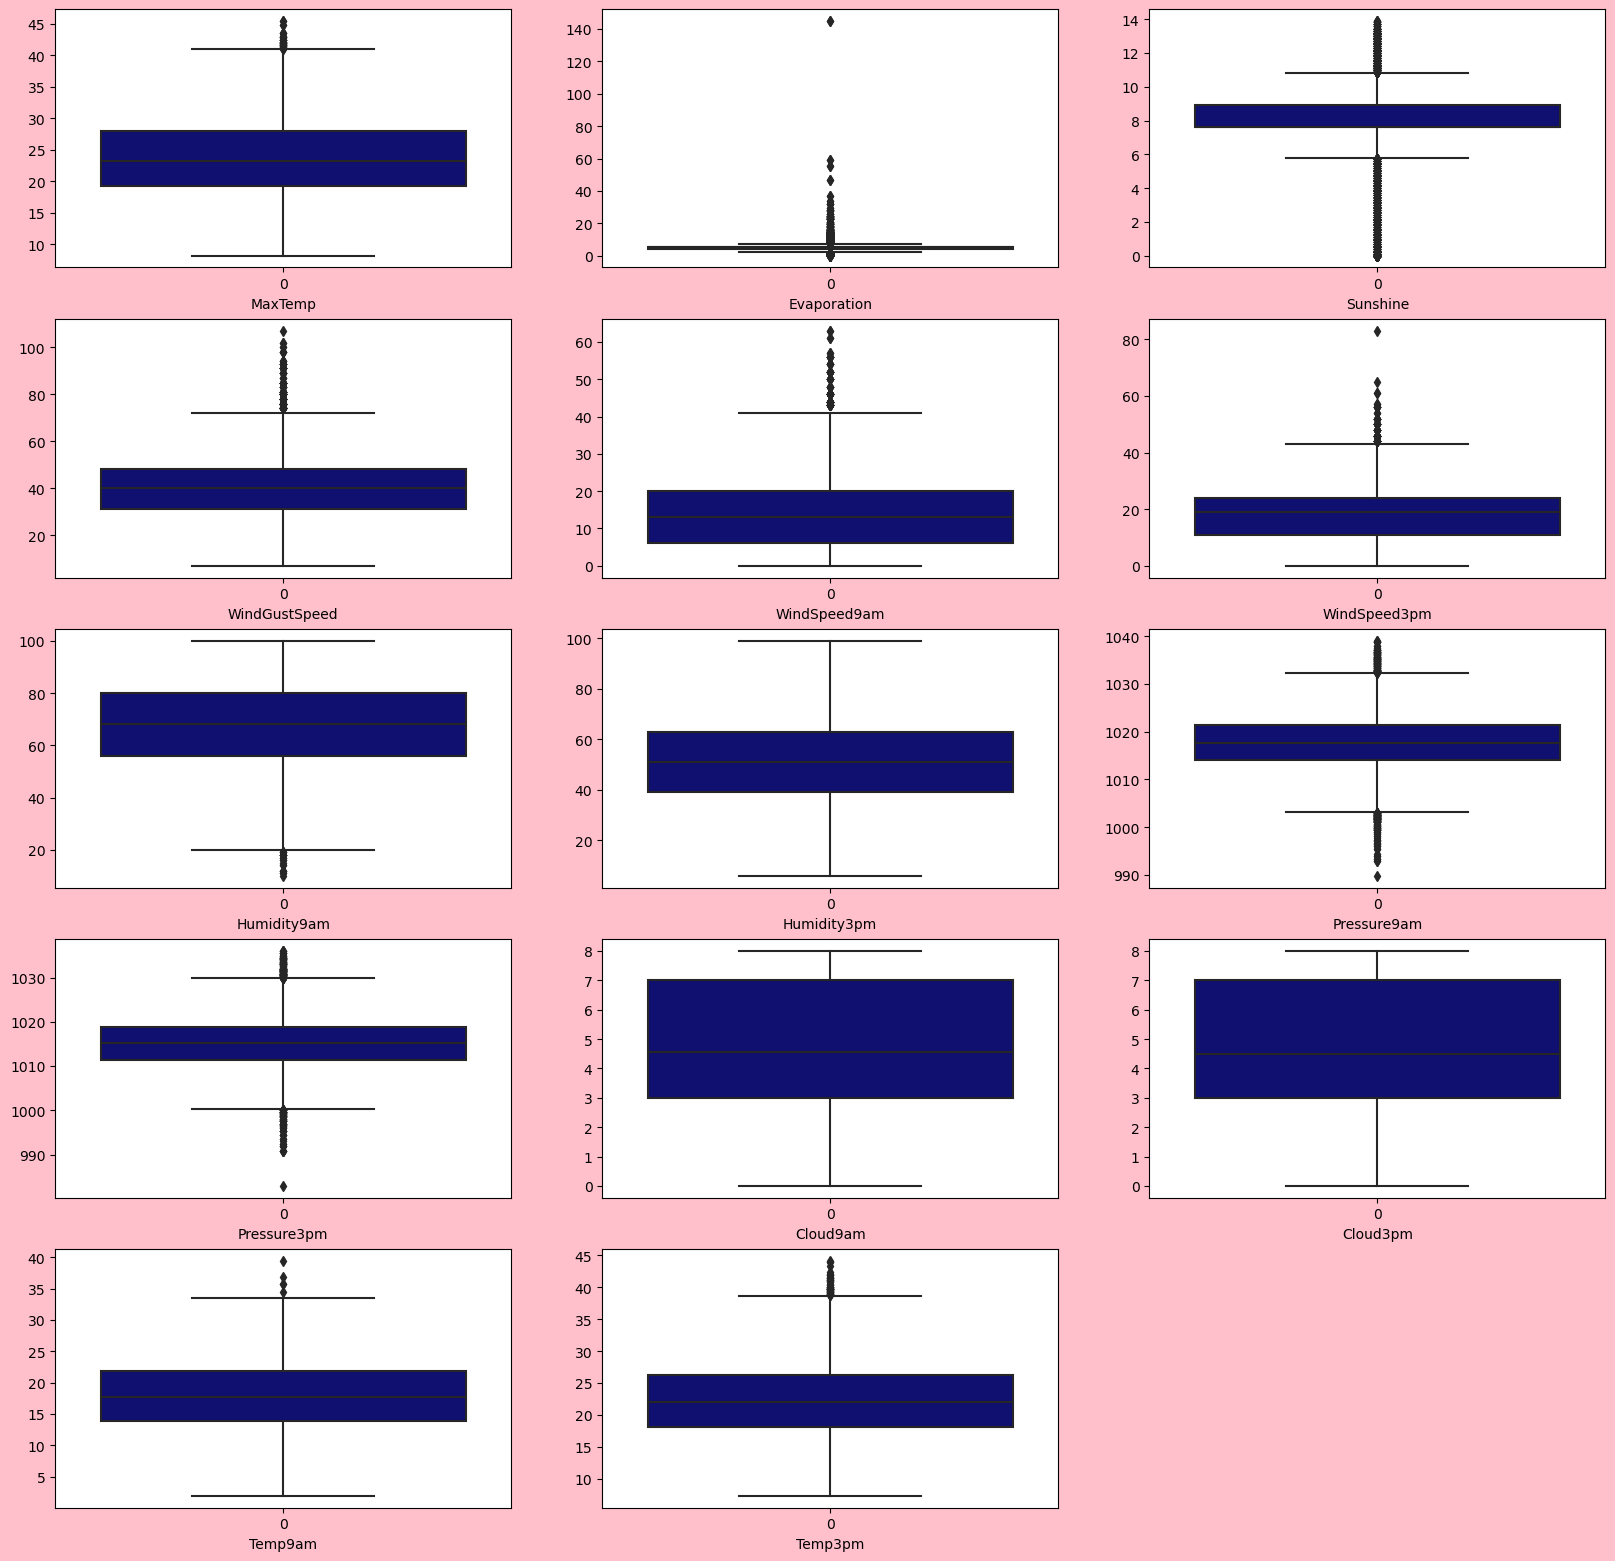

In [18]:
plt.figure(figsize=(20,100),facecolor='pink')
count=1
list=['MaxTemp','Evaporation',
       'Sunshine', 'WindGustSpeed', 
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']
for i in list:
    if count<=30:
        ax=plt.subplot(25,3,count)
        sns.boxplot(df[i],color='navy')
        plt.xlabel(i)
    count+=1
plt.show()

We can observed that the outliers is present in the data set but we will remove outliers 

In [19]:
# Function to remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# List of columns to clean
columns_to_clean = ['MaxTemp','Evaporation',
       'Sunshine', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Pressure9am', 'Pressure3pm','Temp9am','Temp3pm']

# Remove outliers from each column
for column in columns_to_clean:
    df = remove_outliers(df, column)
df.reset_index(drop=True, inplace=True)

We removed outliers only from numerical columns 

### Performing Encoding

In [20]:
column_name=[col for col in df.columns if df[col].dtype=='object' ]
unique_values=[df[col].nunique() for col in column_name]

In [21]:
data_frame=pd.DataFrame({'col_name':column_name,
                        'value':unique_values})

In [22]:
data_frame.sort_values('value', ascending=False)

,col_name,value
6,Day,1473
1,WindGustDir,16
2,WindDir9am,16
3,WindDir3pm,16
0,Location,11
4,RainToday,2
5,RainTomorrow,2


In [23]:
#importing Encoder label Encoder
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in column_name:
    df[column]=labelencoder.fit_transform(df[column])

### First, we will perform classification with 'RainTomorrow' as our target variable.

### Checking Skewness

In [24]:
df.skew()

Location         -0.195679
MinTemp          -0.175251
MaxTemp           0.140403
Rainfall         13.683989
Evaporation      -3.346302
Sunshine         11.603165
WindGustDir       0.582063
WindGustSpeed    -0.382941
WindDir9am        0.434115
WindDir3pm       -0.181411
WindSpeed9am      0.864738
WindSpeed3pm      0.289004
Humidity9am      -0.269192
Humidity3pm       0.120884
Pressure9am       0.829285
Pressure3pm       0.923595
Cloud9am         -0.445787
Cloud3pm         -0.271714
Temp9am          -0.271567
Temp3pm           0.150132
RainToday         1.273556
RainTomorrow      1.386437
Year             -0.627016
Day              -0.341633
Month             0.166621
dtype: float64

We observed skewness in the 'Rainfall', 'Sunshine', 'RainToday', and 'RainTomorrow' columns. Since 'RainToday' and 'RainTomorrow' contain categorical values, we will remove skewness from 'Rainfall' and 'Sunshine' by applying the square root transformation method.

In [25]:
#removing skewness by using cuberoot method
df['Rainfall']=np.cbrt(df['Rainfall'])

In [26]:
df['Sunshine']=np.cbrt(df['Sunshine'])

In [27]:
df.skew()

Location         -0.195679
MinTemp          -0.175251
MaxTemp           0.140403
Rainfall          1.526897
Evaporation      -3.346302
Sunshine         11.587240
WindGustDir       0.582063
WindGustSpeed    -0.382941
WindDir9am        0.434115
WindDir3pm       -0.181411
WindSpeed9am      0.864738
WindSpeed3pm      0.289004
Humidity9am      -0.269192
Humidity3pm       0.120884
Pressure9am       0.829285
Pressure3pm       0.923595
Cloud9am         -0.445787
Cloud3pm         -0.271714
Temp9am          -0.271567
Temp3pm           0.150132
RainToday         1.273556
RainTomorrow      1.386437
Year             -0.627016
Day              -0.341633
Month             0.166621
dtype: float64

#### Checking correlation between target variable and independent variables

In [28]:
corr_matrix=df.corr()
corr_matrix

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Day,Month
Location,1.000000,0.272129,0.062007,0.053980,-0.014998,-0.012955,-0.053818,0.200650,0.185867,-0.237335,...,0.035049,0.071085,0.079232,0.262714,0.055653,0.024333,0.033405,0.488737,0.481777,-0.141860
MinTemp,0.272129,1.000000,0.668327,0.199011,0.079762,0.022911,-0.177245,0.289140,0.026562,-0.201154,...,-0.119520,0.155482,0.094617,0.912111,0.637634,0.169785,0.131271,0.137448,0.094787,-0.269060
MaxTemp,0.062007,0.668327,1.000000,-0.153937,0.062082,-0.020055,-0.203426,0.122960,-0.130652,-0.229419,...,-0.157557,-0.137815,-0.157639,0.806547,0.963365,-0.155109,-0.109622,0.135475,0.104832,-0.135229
Rainfall,0.053980,0.199011,-0.153937,1.000000,0.008252,0.023229,0.021481,0.158672,0.096508,0.073134,...,0.000710,0.262672,0.191763,0.033585,-0.164167,0.847172,0.291962,0.073656,0.066490,-0.052175
Evaporation,-0.014998,0.079762,0.062082,0.008252,1.000000,-0.207046,-0.089235,0.048294,-0.036319,-0.101461,...,-0.098976,-0.047950,-0.012852,0.074084,0.055861,0.000606,-0.054350,-0.019414,-0.019469,-0.012100
Sunshine,-0.012955,0.022911,-0.020055,0.023229,-0.207046,1.000000,0.081139,0.043106,0.062630,0.070715,...,0.037029,0.029134,0.023084,0.017214,-0.022827,0.018905,0.022886,-0.072986,-0.079327,0.018090
WindGustDir,-0.053818,-0.177245,-0.203426,0.021481,-0.089235,0.081139,1.000000,-0.051743,0.312719,0.390647,...,0.141222,0.146443,0.106681,-0.208366,-0.200394,0.052484,-0.018053,-0.187969,-0.125185,-0.010812
WindGustSpeed,0.200650,0.289140,0.122960,0.158672,0.048294,0.043106,-0.051743,1.000000,0.076141,0.142479,...,-0.100868,-0.028253,0.024226,0.290536,0.094459,0.115788,0.108069,0.133095,0.094547,0.023690
WindDir9am,0.185867,0.026562,-0.130652,0.096508,-0.036319,0.062630,0.312719,0.076141,1.000000,0.166817,...,0.086337,0.077907,0.090424,-0.004481,-0.132154,0.103680,-0.009579,0.054059,0.079999,-0.046544
WindDir3pm,-0.237335,-0.201154,-0.229419,0.073134,-0.101461,0.070715,0.390647,0.142479,0.166817,1.000000,...,-0.015977,0.035743,0.033819,-0.221318,-0.235592,0.067864,-0.007565,-0.072601,-0.080297,0.014049


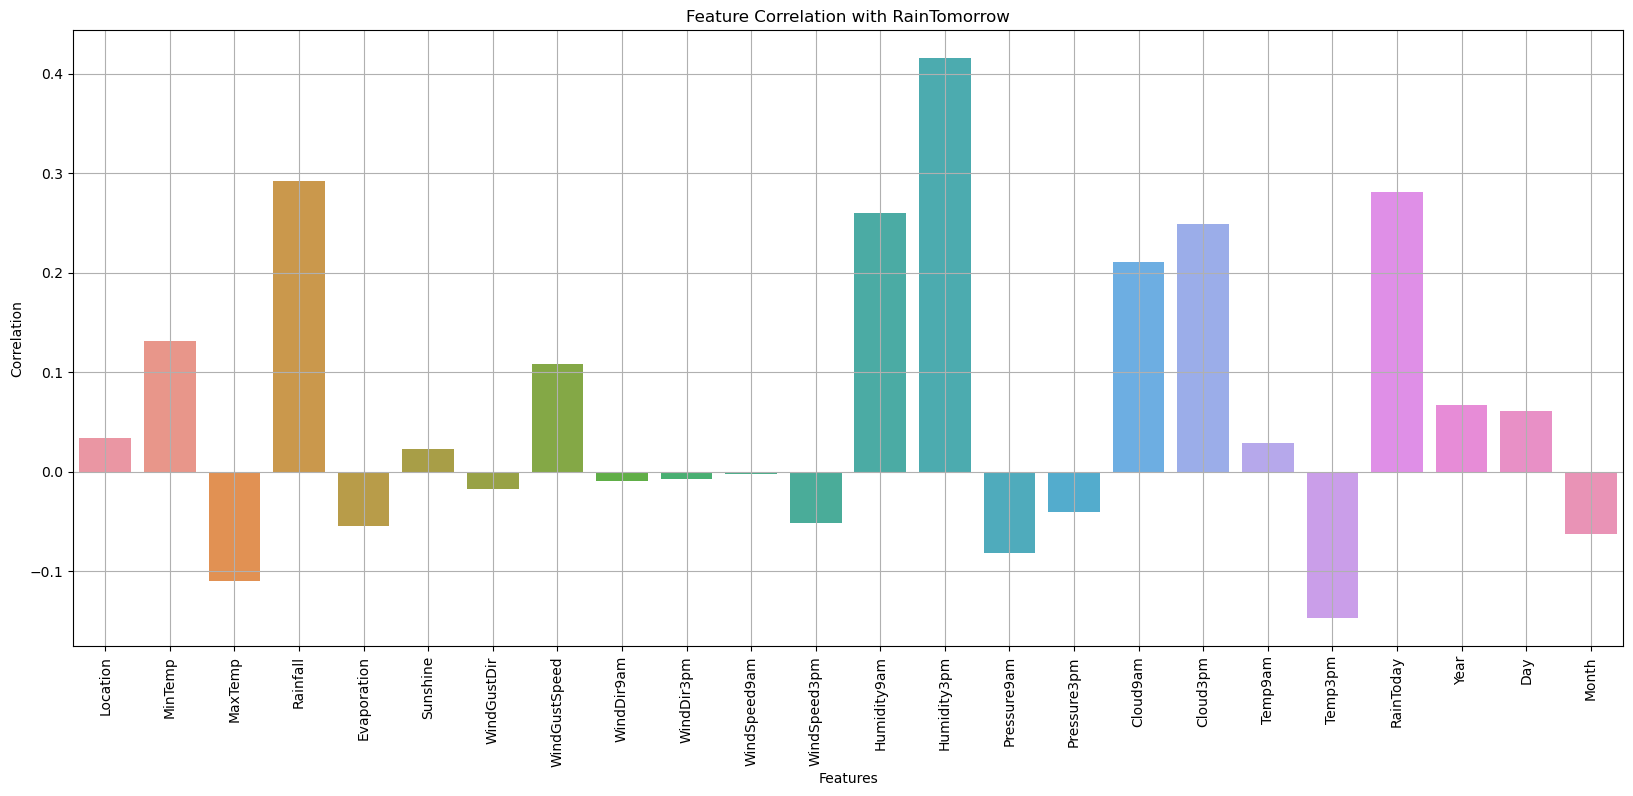

In [29]:
# Plot correlation with target variable
plt.figure(figsize=(20, 8))
sns.barplot(x=corr_matrix['RainTomorrow'].drop('RainTomorrow').index, y=corr_matrix['RainTomorrow'].drop('RainTomorrow').values)
plt.title("Feature Correlation with RainTomorrow")
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

**From the above graphs, we can observe that:**


1. **Humidity3pm**: Shows the highest positive correlation with 'RainTomorrow', indicating that higher humidity at 3 PM is associated with a higher likelihood of rain the next day.

2. **Rainfall**: Also has a strong positive correlation, suggesting that more rainfall is correlated with rain the next day.

3. **Cloud3pm** and **Cloud9am**: Both show positive correlations, with 'Cloud3pm' having a stronger correlation. This suggests that more cloud cover at these times is associated with rain the following day.

4. **Pressure9am** and **Pressure3pm**: Have a negative correlation, meaning lower atmospheric pressure is associated with a higher likelihood of rain the next day.

5. **Sunshine**: Shows a slight negative correlation, indicating that less sunshine is associated with rain the following day.

6. **MinTemp** and **MaxTemp**: Both show a positive correlation, though 'MaxTemp' has a slightly higher correlation. This suggests that higher temperatures are associated with rain the next day.

7. **Temp3pm**: Has a slight negative correlation, indicating that lower temperatures at 3 PM are associated with rain the following day.

8. **RainToday**: Shows a positive correlation, suggesting that if it rained today, it is likely to rain tomorrow as well.

9. **WindGustSpeed**: Has a moderate positive correlation, indicating that higher wind gust speeds are associated with rain the next day.

10. **WindDir3pm**: Shows a slight negative correlation, indicating that certain wind directions at 3 PM are associated with less likelihood of rain the following day.

Other features such as **Location**, **Evaporation**, **WindSpeed9am**, **WindSpeed3pm**, **WindDir9am**, **Year**, **Day**, and **Month** show relatively low correlations with 'RainTomorrow'. This suggests they may have less predictive power for this particular target variable.

#### Splitting the data into training and test

In [30]:
#seperating independent variable and target into x and y
x=df.drop('RainTomorrow',axis=1)
y=df['RainTomorrow']
print('Dimension of independent',x.shape)
print('Dimension of Target',y.shape)

Dimension of independent (2332, 24)
Dimension of Target (2332,)


#### Feature Scaling using Standard Scalarization

In [31]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Day,Month
0,-1.538267,-0.588316,0.894714,-0.67283,0.101644,-0.08608,-0.521853,-1.254405,0.548071,-1.950066,...,-0.336864,-1.625877,-0.107182,-0.086032,0.274966,0.862166,-0.548944,-2.120433,-1.821792,1.742587
1,-1.538267,-0.474745,0.437614,-0.67283,0.101644,-0.08608,0.843729,-1.041809,0.548071,-0.436149,...,0.380441,0.581746,-0.107182,-0.086032,-0.175526,0.219827,-0.548944,-2.120433,-1.817269,1.742587
2,-1.538267,-0.152960,1.142310,-0.67283,0.101644,-0.08608,0.388535,-1.254405,0.548071,0.320809,...,0.425273,-0.599076,-0.107182,-0.086032,0.470832,1.017884,-0.548944,-2.120433,-1.815007,1.742587
3,-1.538267,-0.512602,0.113834,-0.67283,0.101644,-0.08608,1.526520,0.552662,1.970818,0.825448,...,-1.771476,-1.471856,-0.107182,-0.086032,-0.351806,0.005715,-0.548944,-1.726610,-1.808222,-1.570059
4,-1.538267,-0.342245,1.047081,-0.67283,0.101644,-0.08608,0.843729,-1.041809,0.785195,-1.950066,...,0.156283,-0.599076,-0.107182,-0.086032,0.079100,0.862166,-0.548944,-1.726610,-1.805960,-1.570059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2327,0.893524,-1.799740,0.018605,-0.67283,0.101644,-0.08608,-1.432241,-0.510319,0.548071,-1.697746,...,2.801348,2.224627,-0.107182,-0.086032,-1.291964,0.064109,-0.548944,1.423980,1.498296,-0.064311
2328,0.893524,-1.648312,0.380476,-0.67283,0.101644,-0.08608,-0.066659,-1.467001,0.548071,-1.193107,...,2.308201,1.608547,-0.107182,-0.086032,-1.135271,0.472870,-0.548944,1.423980,1.500557,-0.064311
2329,0.893524,-1.307599,0.685209,-0.67283,0.101644,-0.08608,-0.749450,0.127470,0.548071,1.582406,...,1.187410,0.427725,-0.107182,-0.086032,-0.821885,0.784306,-0.548944,1.423980,1.502819,-0.064311
2330,0.893524,-0.853315,0.704255,-0.67283,0.101644,-0.08608,0.616132,-0.829213,0.785195,-1.193107,...,0.470105,0.273705,-0.818076,-1.334611,-0.312632,0.764842,-0.548944,1.423980,1.505081,-0.064311


#### Checking Variance Inflation Factor(VIF)

In [32]:
#Checking Variance Inflation Factor(VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF Values,Features
0,1.837890,Location
1,10.956702,MinTemp
2,16.328352,MaxTemp
3,3.922158,Rainfall
4,1.095277,Evaporation
5,1.074656,Sunshine
6,1.626333,WindGustDir
7,1.633681,WindGustSpeed
8,1.407682,WindDir9am
9,1.492503,WindDir3pm


In [33]:
x.drop('Year',axis=1,inplace=True)

In [34]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF Values,Features
0,1.813002,Location
1,10.955676,MinTemp
2,16.238561,MaxTemp
3,3.915054,Rainfall
4,1.090943,Evaporation
5,1.072650,Sunshine
6,1.536289,WindGustDir
7,1.566621,WindGustSpeed
8,1.407682,WindDir9am
9,1.472120,WindDir3pm


### Performing PCA(Principal Component Analysis (PCA))

In [35]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4) 
x=pca.fit_transform(x)

- We have scaled the data using the standard scaler method to ensure that all features contribute equally to the analysis, thus overcoming the issue of bias caused by varying scales of the features.
- We have used the PCA method to manage bias in the data by transforming the original features into a set of orthogonal components, which helps in reducing dimensionality and capturing the most important variance in the data

### Oversampling

In [36]:
#Oversampling the data
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)

We used an oversampling method to address the class imbalance problem

#### Model Selection

In [37]:
#Importing mode
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier #Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier #Random Forest Classifier and Extra Trees Classifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier #Gradient Boosting Classifier ,AdaBoost Classifier 
from sklearn.svm import SVC #Support Vector Classifier
from sklearn.neighbors import KNeighborsClassifier #K-Nearest Neighbors Classifier

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
#find the best random State
max_accuracy=0
best_state=0
random_state=range(1,200)
for state in random_state:
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=state)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>max_accuracy:
        max_accuracy=acc
        best_state=state
print("Maximum accuracy_Score is=>",max_accuracy,"On Random State=>",best_state)

Maximum accuracy_Score is=> 0.7513661202185792 On Random State=> 60


In [40]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=best_state)

#### LogisticRegression

In [41]:
LG=LogisticRegression()
LG.fit(x_train,y_train)
pred_lg=LG.predict(x_test)
print(LG)
print('Accuracy Score:-',accuracy_score(y_test,pred_lg))
print('Confusion Matrix:-',confusion_matrix(y_test,pred_lg))
print('Classification Report:-',classification_report(y_test,pred_lg))
print('---'*20)

LogisticRegression()
Accuracy Score:- 0.7513661202185792
Confusion Matrix:- [[406 128]
 [145 419]]
Classification Report:-               precision    recall  f1-score   support

           0       0.74      0.76      0.75       534
           1       0.77      0.74      0.75       564

    accuracy                           0.75      1098
   macro avg       0.75      0.75      0.75      1098
weighted avg       0.75      0.75      0.75      1098

------------------------------------------------------------


#### ExtraTreesClassifier

In [42]:
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
pred_etc=etc.predict(x_test)
print(etc)
print('Accuracy Score:-',accuracy_score(y_test,pred_etc))
print('Confusion Matrix:-',confusion_matrix(y_test,pred_etc))
print('Classification Report:-',classification_report(y_test,pred_etc))
print('---'*20)

ExtraTreesClassifier()
Accuracy Score:- 0.8879781420765027
Confusion Matrix:- [[464  70]
 [ 53 511]]
Classification Report:-               precision    recall  f1-score   support

           0       0.90      0.87      0.88       534
           1       0.88      0.91      0.89       564

    accuracy                           0.89      1098
   macro avg       0.89      0.89      0.89      1098
weighted avg       0.89      0.89      0.89      1098

------------------------------------------------------------


#### DecisionTreeClassifier

In [43]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc=dtc.predict(x_test)
print(dtc)
print('Accuracy Score:-',accuracy_score(y_test,pred_dtc))
print('Confusion Matrix:-',confusion_matrix(y_test,pred_dtc))
print('Classification Report:-',classification_report(y_test,pred_dtc))
print('---'*20)

DecisionTreeClassifier()
Accuracy Score:- 0.8014571948998178
Confusion Matrix:- [[422 112]
 [106 458]]
Classification Report:-               precision    recall  f1-score   support

           0       0.80      0.79      0.79       534
           1       0.80      0.81      0.81       564

    accuracy                           0.80      1098
   macro avg       0.80      0.80      0.80      1098
weighted avg       0.80      0.80      0.80      1098

------------------------------------------------------------


#### GradientBoostingClassifier

In [44]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
pred_gbc=gbc.predict(x_test)
print(gbc)
print('Accuracy Score:-',accuracy_score(y_test,pred_gbc))
print('Confusion Matrix:-',confusion_matrix(y_test,pred_gbc))
print('Classification Report:-',classification_report(y_test,pred_gbc))
print('---'*20)

GradientBoostingClassifier()
Accuracy Score:- 0.7786885245901639
Confusion Matrix:- [[398 136]
 [107 457]]
Classification Report:-               precision    recall  f1-score   support

           0       0.79      0.75      0.77       534
           1       0.77      0.81      0.79       564

    accuracy                           0.78      1098
   macro avg       0.78      0.78      0.78      1098
weighted avg       0.78      0.78      0.78      1098

------------------------------------------------------------


#### AdaBoostClassifier

In [45]:
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
pred_abc=abc.predict(x_test)
print(abc)
print('Accuracy Score:-',accuracy_score(y_test,pred_abc))
print('Confusion Matrix:-',confusion_matrix(y_test,pred_abc))
print('Classification Report:-',classification_report(y_test,pred_abc))
print('---'*20)

AdaBoostClassifier()
Accuracy Score:- 0.7413479052823315
Confusion Matrix:- [[381 153]
 [131 433]]
Classification Report:-               precision    recall  f1-score   support

           0       0.74      0.71      0.73       534
           1       0.74      0.77      0.75       564

    accuracy                           0.74      1098
   macro avg       0.74      0.74      0.74      1098
weighted avg       0.74      0.74      0.74      1098

------------------------------------------------------------


#### RandomForestClassifier

In [46]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_rfc=rfc.predict(x_test)
print(rfc)
print('Accuracy Score:-',accuracy_score(y_test,pred_rfc))
print('Confusion Matrix:-',confusion_matrix(y_test,pred_rfc))
print('Classification Report:-',classification_report(y_test,pred_rfc))
print('---'*20)

RandomForestClassifier()
Accuracy Score:- 0.8688524590163934
Confusion Matrix:- [[451  83]
 [ 61 503]]
Classification Report:-               precision    recall  f1-score   support

           0       0.88      0.84      0.86       534
           1       0.86      0.89      0.87       564

    accuracy                           0.87      1098
   macro avg       0.87      0.87      0.87      1098
weighted avg       0.87      0.87      0.87      1098

------------------------------------------------------------


#### KNeighborsClassifier

In [47]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
print(knn)
print('Accuracy Score:-',accuracy_score(y_test,pred_knn))
print('Confusion Matrix:-',confusion_matrix(y_test,pred_knn))
print('Classification Report:-',classification_report(y_test,pred_knn))
print('---'*20)

KNeighborsClassifier()
Accuracy Score:- 0.819672131147541
Confusion Matrix:- [[379 155]
 [ 43 521]]
Classification Report:-               precision    recall  f1-score   support

           0       0.90      0.71      0.79       534
           1       0.77      0.92      0.84       564

    accuracy                           0.82      1098
   macro avg       0.83      0.82      0.82      1098
weighted avg       0.83      0.82      0.82      1098

------------------------------------------------------------


#### SVC

In [48]:
svc=SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
print(svc)
print('Accuracy Score:-',accuracy_score(y_test,pred_svc))
print('Confusion Matrix:-',confusion_matrix(y_test,pred_svc))
print('Classification Report:-',classification_report(y_test,pred_svc))
print('---'*20)

SVC()
Accuracy Score:- 0.76775956284153
Confusion Matrix:- [[402 132]
 [123 441]]
Classification Report:-               precision    recall  f1-score   support

           0       0.77      0.75      0.76       534
           1       0.77      0.78      0.78       564

    accuracy                           0.77      1098
   macro avg       0.77      0.77      0.77      1098
weighted avg       0.77      0.77      0.77      1098

------------------------------------------------------------


### Cross Validation Score

In [49]:
from sklearn.model_selection import cross_val_score

#### LogisticRegression

In [50]:
score=cross_val_score(LG,x,y)
print(score)
print(score.mean())
print('Difference between accuracy score and cross validation score is:',(accuracy_score(y_test,pred_lg)-score.mean())*100)

[0.81584582 0.80299786 0.78969957 0.82618026 0.83476395]
0.8138974919815091
Difference between accuracy score and cross validation score is: -6.253137176292989


#### ExtraTreesClassifier

In [51]:
score1=cross_val_score(etc,x,y)
print(score1)
print(score1.mean())
print('Difference between accuracy score and cross validation score is:',(accuracy_score(y_test,pred_etc)-score1.mean())*100)

[0.78800857 0.77730193 0.75107296 0.88841202 0.87339056]
0.815637205797208
Difference between accuracy score and cross validation score is: 7.234093627929472


#### DecisionTreeClassifier

In [52]:
score2=cross_val_score(dtc,x,y)
print(score2)
print(score2.mean())
print('Difference between accuracy score and cross validation score is:',(accuracy_score(y_test,pred_dtc)-score2.mean())*100)

[0.71948608 0.71092077 0.69742489 0.84549356 0.87553648]
0.7697723575741423
Difference between accuracy score and cross validation score is: 3.168483732567551


#### GradientBoostingClassifier

In [53]:
score3=cross_val_score(gbc,x,y)
print(score3)
print(score3.mean())
print('Difference between accuracy score and cross validation score is:',(accuracy_score(y_test,pred_gbc)-score3.mean())*100)

[0.72805139 0.80085653 0.78111588 0.83261803 0.85622318]
0.799773000891454
Difference between accuracy score and cross validation score is: -2.1084476301290067


#### AdaBoostClassifier

In [54]:
score4=cross_val_score(abc,x,y)
print(score4)
print(score4.mean())
print('Difference between accuracy score and cross validation score is:',(accuracy_score(y_test,pred_abc)-score4.mean())*100)

[0.79014989 0.80728051 0.76609442 0.82618026 0.82403433]
0.8027478839455571
Difference between accuracy score and cross validation score is: -6.139997866322555


#### RandomForestClassifier

In [55]:
score5=cross_val_score(rfc,x,y)
print(score5)
print(score5.mean())
print('Difference between accuracy score and cross validation score is:',(accuracy_score(y_test,pred_rfc)-score5.mean())*100)

[0.77730193 0.80513919 0.77253219 0.89055794 0.90128755]
0.8293637591787595
Difference between accuracy score and cross validation score is: 3.9488699837633923


#### KNeighborsClassifier

In [56]:
score6=cross_val_score(knn,x,y)
print(score6)
print(score6.mean())
print('Difference between accuracy score and cross validation score is:',(accuracy_score(y_test,pred_knn)-score6.mean())*100)

[0.78158458 0.76659529 0.76609442 0.78540773 0.80042918]
0.7800222403984891
Difference between accuracy score and cross validation score is: 3.9649890749051897


#### SVC

In [57]:
score7=cross_val_score(svc,x,y)
print(score7)
print(score7.mean())
print('Difference between accuracy score and cross validation score is:',(accuracy_score(y_test,pred_svc)-score7.mean())*100)

[0.80513919 0.80513919 0.79613734 0.80901288 0.81545064]
0.806175846192021
Difference between accuracy score and cross validation score is: -3.8416283350490965


**Based on these observations**
- The ExtraTreesClassifier seems to perform relatively well among the models tested, as it has a high mean cross-validation score and a small difference between accuracy score and cross-validation score
- ExtraTreesClassifier is our best fitting and best performing model

### Hyper Paramter Tuning

In [58]:
from sklearn.model_selection import GridSearchCV

In [60]:
param_grid={'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30],
    'min_samples_leaf': [1, 2, 4]}

In [61]:
GCV=GridSearchCV(rfc,param_grid,cv=5)

In [62]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [100, 200, 300]})

In [63]:
GCV.best_params_

{'max_depth': 20,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'n_estimators': 300}

In [64]:
best_model=RandomForestClassifier(n_estimators=300,max_depth=20,max_features='log2',min_samples_leaf=1)
best_model.fit(x_train,y_train)
pred_RFC=best_model.predict(x_test)
print('Accuracy Score:-',accuracy_score(y_test,pred_RFC)*100)
print('Confusion Matrix:-',confusion_matrix(y_test,pred_RFC))
print('Classification Report:-',classification_report(y_test,pred_RFC))

Accuracy Score:- 87.34061930783243
Confusion Matrix:- [[451  83]
 [ 56 508]]
Classification Report:-               precision    recall  f1-score   support

           0       0.89      0.84      0.87       534
           1       0.86      0.90      0.88       564

    accuracy                           0.87      1098
   macro avg       0.87      0.87      0.87      1098
weighted avg       0.87      0.87      0.87      1098



#### My model give 87.34% accuracy

### Plotting AUC ROC curve

In [65]:
from sklearn.metrics import roc_curve,auc,roc_auc_score,precision_recall_curve
from sklearn import metrics

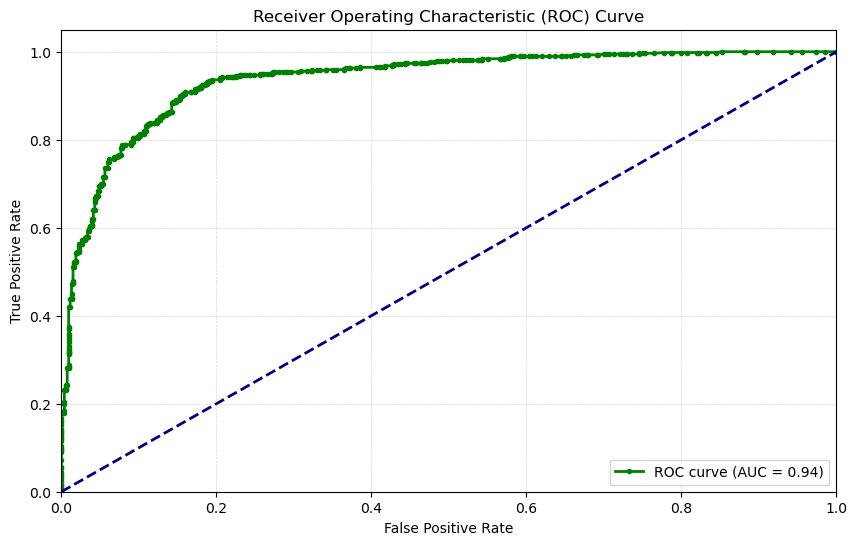

In [66]:
# Calculate probabilities for the positive class
y_prob = best_model.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})', marker='o', markersize=3)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()

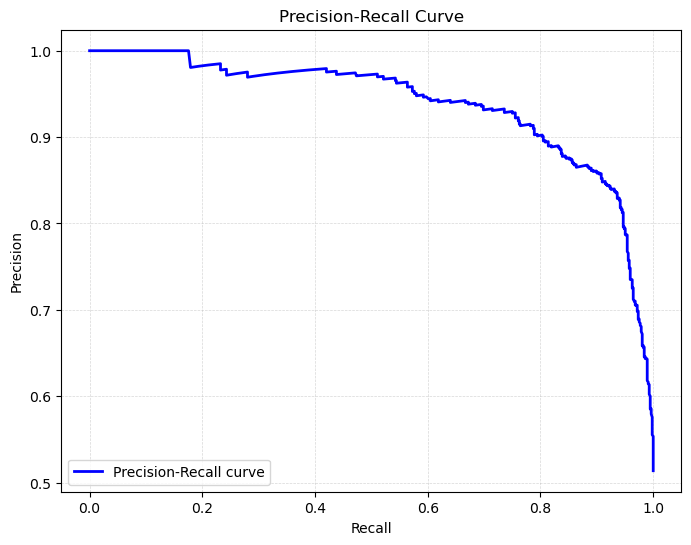

In [67]:
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()

### Saving the Model

In [68]:
#importing joblib and saving model
import joblib
joblib.dump(best_model,"Rainfall Weather Forcasting project.pkl")

['Rainfall Weather Forcasting project.pkl']

In [69]:
#Now loading file and checcking prediction 
model=joblib.load("Rainfall Weather Forcasting project.pkl")

In [70]:
prediction=model.predict(x_test)
prediction

array([1, 1, 0, ..., 0, 0, 0])

In [73]:
Original=np.array(y_test)
df=pd.DataFrame()
df['Original']=Original
df['prediction']=prediction
df.tail(10)

,Original,prediction
1088,1,0
1089,0,0
1090,0,0
1091,1,0
1092,1,1
1093,0,0
1094,1,1
1095,0,0
1096,0,0
1097,0,0


### We will perform Regression with 'Rainfall' as our target variable

#### Checking Skewness

In [310]:
df.skew()

Location         -0.195679
MinTemp          -0.175251
MaxTemp           0.140403
Rainfall         13.683989
Evaporation      -3.346302
Sunshine         11.603165
WindGustDir       0.582063
WindGustSpeed    -0.382941
WindDir9am        0.434115
WindDir3pm       -0.181411
WindSpeed9am      0.864738
WindSpeed3pm      0.289004
Humidity9am      -0.269192
Humidity3pm       0.120884
Pressure9am       0.829285
Pressure3pm       0.923595
Cloud9am         -0.445787
Cloud3pm         -0.271714
Temp9am          -0.271567
Temp3pm           0.150132
RainToday         1.273556
RainTomorrow      1.386437
Year             -0.627016
Day              -0.341633
Month             0.166621
dtype: float64

We observed skewness in the 'Rainfall', 'Sunshine', 'RainToday', and 'RainTomorrow' columns. Since 'RainToday' and 'RainTomorrow' contain categorical values & 'Rainfall' is target variable, we will remove skewness from 'Sunshine' by applying the square root transformation method.

In [311]:
df['Sunshine']=np.cbrt(df['Sunshine'])

### Checking correlation between target variable and independent variables

In [313]:
corr_matrix=df.corr()

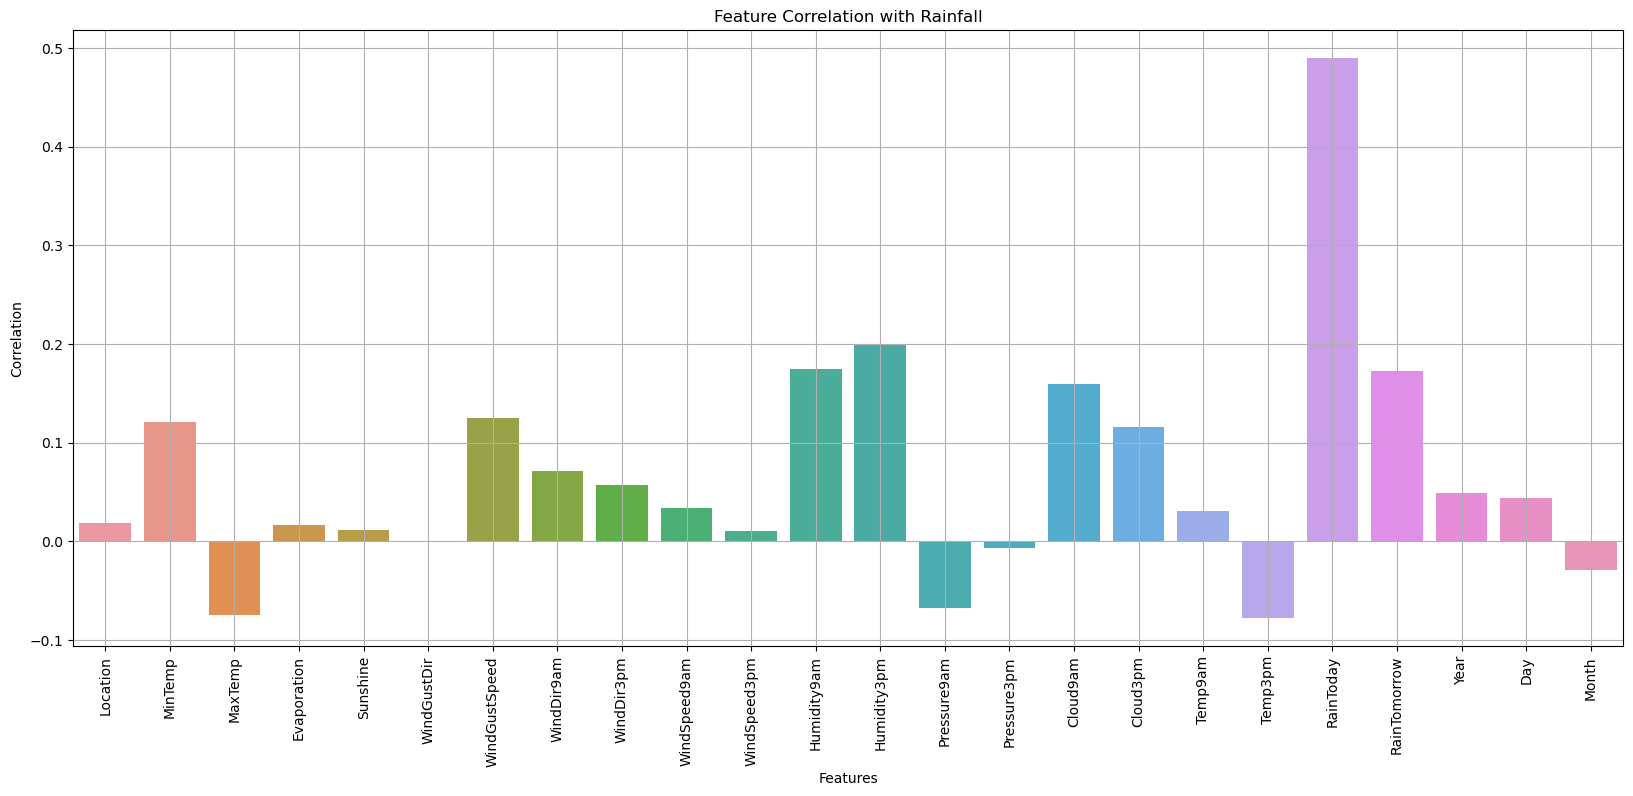

In [314]:
# Plot correlation with target variable
plt.figure(figsize=(20, 8))
sns.barplot(x=corr_matrix['Rainfall'].drop('Rainfall').index, y=corr_matrix['Rainfall'].drop('Rainfall').values)
plt.title("Feature Correlation with Rainfall")
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

**From above graph we can observe**
1. **RainToday** has the highest positive correlation with rainfall, indicating that if it rained today, it is highly likely that there was a significant amount of rainfall.
2. **Humidity3pm** and **Humidity9am** show a strong positive correlation with rainfall, suggesting that higher humidity levels are associated with increased rainfall.
3. **WindGustSpeed** also has a positive correlation with rainfall, indicating that stronger wind gusts are linked to higher rainfall.
4. **Cloud3pm** and **Cloud9am** have a moderate positive correlation with rainfall, implying that more cloud cover is associated with increased rainfall.
5. **Pressure9am** shows a negative correlation with rainfall, suggesting that lower atmospheric pressure is associated with higher rainfall.
6. **MinTemp** and **WindDir9am** have a slight positive correlation with rainfall, indicating that these features have a minor association with increased rainfall.
7. **WindSpeed9am**, **WindSpeed3pm**, and **WindDir3pm** show little to no correlation with rainfall, suggesting that wind speed and direction at these times do not significantly impact rainfall.
8. **Evaporation**, **Sunshine**, **MaxTemp**, and **Pressure3pm** have little to no correlation with rainfall, indicating that these factors do not significantly impact rainfall.
9. **Year**, **Day**, and **Month** show slight negative correlations with rainfall, suggesting minor inverse relationships with rainfall.
10. **Location** has nearly no correlation with rainfall, implying that the geographical location does not significantly affect the amount of rainfall.

### Splitting the data into training and test

In [315]:
#seperating independent variable and target into x and y
x=df.drop('Rainfall',axis=1)
y=df['Rainfall']
print('Dimension of independent',x.shape)
print('Dimension of Target',y.shape)

Dimension of independent (2332, 24)
Dimension of Target (2332,)


### Feature scaling using StandardScaler

In [316]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Day,Month
0,-1.538267,-0.588316,0.894714,0.101644,-0.08608,-0.521853,-1.254405,0.548071,-1.950066,0.375297,...,-1.625877,-0.107182,-0.086032,0.274966,0.862166,-0.548944,-0.523753,-2.120433,-1.821792,1.742587
1,-1.538267,-0.474745,0.437614,0.101644,-0.08608,0.843729,-1.041809,0.548071,-0.436149,1.177980,...,0.581746,-0.107182,-0.086032,-0.175526,0.219827,-0.548944,-0.523753,-2.120433,-1.817269,1.742587
2,-1.538267,-0.152960,1.142310,0.101644,-0.08608,0.388535,-1.254405,0.548071,0.320809,0.107736,...,-0.599076,-0.107182,-0.086032,0.470832,1.017884,-0.548944,-0.523753,-2.120433,-1.815007,1.742587
3,-1.538267,-0.512602,0.113834,0.101644,-0.08608,1.526520,0.552662,1.970818,0.825448,1.445541,...,-1.471856,-0.107182,-0.086032,-0.351806,0.005715,-0.548944,-0.523753,-1.726610,-1.808222,-1.570059
4,-1.538267,-0.342245,1.047081,0.101644,-0.08608,0.843729,-1.041809,0.785195,-1.950066,0.375297,...,-0.599076,-0.107182,-0.086032,0.079100,0.862166,-0.548944,-0.523753,-1.726610,-1.805960,-1.570059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2327,0.893524,-1.799740,0.018605,0.101644,-0.08608,-1.432241,-0.510319,0.548071,-1.697746,0.642858,...,2.224627,-0.107182,-0.086032,-1.291964,0.064109,-0.548944,-0.523753,1.423980,1.498296,-0.064311
2328,0.893524,-1.648312,0.380476,0.101644,-0.08608,-0.066659,-1.467001,0.548071,-1.193107,0.642858,...,1.608547,-0.107182,-0.086032,-1.135271,0.472870,-0.548944,-0.523753,1.423980,1.500557,-0.064311
2329,0.893524,-1.307599,0.685209,0.101644,-0.08608,-0.749450,0.127470,0.548071,1.582406,0.107736,...,0.427725,-0.107182,-0.086032,-0.821885,0.784306,-0.548944,-0.523753,1.423980,1.502819,-0.064311
2330,0.893524,-0.853315,0.704255,0.101644,-0.08608,0.616132,-0.829213,0.785195,-1.193107,0.642858,...,0.273705,-0.818076,-1.334611,-0.312632,0.764842,-0.548944,-0.523753,1.423980,1.505081,-0.064311


We have scaled the data using the standard scaler method to ensure that all features contribute equally to the analysis, thus overcoming the issue of bias caused by varying scales of the features

In [317]:
#Checking Variance Inflation Factor(VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF Values,Features
0,1.852752,Location
1,10.885636,MinTemp
2,16.344199,MaxTemp
3,1.101639,Evaporation
4,1.074700,Sunshine
5,1.628221,WindGustDir
6,1.643420,WindGustSpeed
7,1.407545,WindDir9am
8,1.496694,WindDir3pm
9,1.938688,WindSpeed9am


The column 'Day' have high VIF value so we will drop this column

In [318]:
x.drop('Day',axis=1,inplace=True)

In [319]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF Values,Features
0,1.852720,Location
1,10.877621,MinTemp
2,16.264879,MaxTemp
3,1.098084,Evaporation
4,1.070567,Sunshine
5,1.560685,WindGustDir
6,1.573774,WindGustSpeed
7,1.407339,WindDir9am
8,1.484517,WindDir3pm
9,1.905003,WindSpeed9am


### Performing PCA(Principal Component Analysis (PCA))

In [320]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4) 
x=pca.fit_transform(x)

We have used the PCA method to manage bias in the data by transforming the original features into a set of orthogonal components, which helps in reducing dimensionality and capturing the most important variance in the data

In [321]:
from sklearn.model_selection import train_test_split

In [322]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
#find the best random State
max_accuracy=0
best_state=0
random_state=range(1,200)
for state in random_state:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=state)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>max_accuracy:
        max_accuracy=acc
        best_state=state
print("Maximum R2_Score is=>",max_accuracy,"On Random State=>",best_state)

Maximum R2_Score is=> 0.20468057705598963 On Random State=> 35


In [323]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=best_state)

#### Linear Regression

In [324]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
LR=LinearRegression()
LR.fit(x_train,y_train)
LR_pred=LR.predict(x_test)
accuracy_LR=r2_score(y_test,LR_pred)
print('R2 Score:-',accuracy_LR*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,LR_pred))
print('Mean Squared Error:-',mean_squared_error(y_test,LR_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,LR_pred)))

R2 Score:- 20.468057705598962
Mean Absolute Error:- 2.9673668929268744
Mean Squared Error:- 34.237474648132945
Root Mean Squared Error: 5.851279744477523


#### Random Forest Regressor

In [325]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
RFR_pred=RFR.predict(x_test)
accuracy_RFR=r2_score(y_test,RFR_pred)
print('R2 Score',accuracy_RFR*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,RFR_pred))
print('Mean Squared Error:-',mean_squared_error(y_test,RFR_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,RFR_pred)))

R2 Score 15.54347380250023
Mean Absolute Error:- 2.4729647548651714
Mean Squared Error:- 36.35744445738047
Root Mean Squared Error: 6.029713463953363


#### ExtraTrees Regressor

In [326]:
from sklearn.ensemble import ExtraTreesRegressor
ETC=ExtraTreesRegressor()
ETC.fit(x_train,y_train)
ETC_pred=ETC.predict(x_test)
accuracy_ETC=r2_score(y_test,ETC_pred)
print('R2 Score',accuracy_ETC*100)
print('Mean absolute Error',mean_absolute_error(y_test,ETC_pred))
print('Mean Squared Error',mean_squared_error(y_test,ETC_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,ETC_pred)))

R2 Score 19.047834501300187
Mean absolute Error 2.2970114095470815
Mean Squared Error 34.848862406926465
Root Mean Squared Error: 5.903292505621457


#### Lasso Regressor

In [327]:
from sklearn.linear_model import Lasso
LS=Lasso()
LS.fit(x_train,y_train)
pred_ls=LS.predict(x_test)
accuracy_ls=r2_score(y_test,pred_ls)
print('R2 Score:',accuracy_ls*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_ls))
print('Mean Squared Error:',mean_squared_error(y_test,pred_ls))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_ls)))

R2 Score: 17.55427580581913
Mean Absolute Error: 2.9125624980652827
Mean Squared Error: 35.49182014814123
Root Mean Squared Error: 5.95750116644061


#### Redge Regressor

In [328]:
from sklearn.linear_model import Ridge
RG=Ridge()
RG.fit(x_train,y_train)
RG_pred=RG.predict(x_test)
accuracy_RG=r2_score(y_test,RG_pred)
print('R2 Score',accuracy_RG*100)
print('Mean Absolute Error',mean_absolute_error(y_test,RG_pred))
print('Mean Squared Error',mean_squared_error(y_test,RG_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,RG_pred)))

R2 Score 20.466515277272467
Mean Absolute Error 2.9672839803019713
Mean Squared Error 34.23813864361956
Root Mean Squared Error: 5.851336483541137


#### K-Neighbors Regressor

In [329]:
from sklearn.neighbors import KNeighborsRegressor as KNN
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
accuracy_knn=r2_score(y_test,pred_knn)
print('R2 Score:',accuracy_knn*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_knn))
print('Mean Squared Error:',mean_squared_error(y_test,pred_knn))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_knn)))

R2 Score: 0.4693493682742411
Mean Absolute Error: 2.528751754952439
Mean Squared Error: 42.8466604663292
Root Mean Squared Error: 6.54573605229612


#### SVR

In [330]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
print('R2 Score:',r2_score(y_test,pred_svr)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_svr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_svr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_svr)))

R2 Score: 6.983867359029395
Mean Absolute Error: 2.0459503935688335
Mean Squared Error: 40.042244553441485
Root Mean Squared Error: 6.327894164209883


#### GradientBoostingRegressor

In [331]:
from sklearn.ensemble import GradientBoostingRegressor 
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
print('R2 Score:',r2_score(y_test,pred_GBR)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_GBR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2 Score: 18.7116673139335
Mean Absolute Error: 2.5388548797108927
Mean Squared Error: 34.993578042216704
Root Mean Squared Error: 5.915537003706147


#### Cross Validation

In [332]:
from sklearn.model_selection import cross_val_score

In [333]:
score1=cross_val_score(LR,x,y,cv=5,scoring='r2')
print(score1)
print(score1.mean())
print('Difference between R2 score and cross validation score is:',(r2_score(y_test,LR_pred)-score1.mean())*100)

[0.13893523 0.16840696 0.04976016 0.15625519 0.0164315 ]
0.1059578046243024
Difference between R2 score and cross validation score is: 9.872277243168723


In [334]:
score2=cross_val_score(RFR,x,y,cv=5,scoring='r2')
print(score2)
print(score2.mean())
print('Difference between R2 score and cross validation score is:',(r2_score(y_test,RFR_pred)-score2.mean())*100)

[ 0.19133284 -0.70130554  0.07558569  0.36048804  0.31836882]
0.048893968555518974
Difference between R2 score and cross validation score is: 10.654076946948333


In [335]:
score3=cross_val_score(ETC,x,y)
print(score3)
print(score3.mean())
print('Difference Between R2 score and cross validation score is:',(r2_score(y_test,ETC_pred)-score3.mean())*100)

[ 0.10756851 -0.13163844  0.0896916   0.38131832  0.49661541]
0.18871107980769847
Difference Between R2 score and cross validation score is: 0.17672652053034033


In [336]:
score4=cross_val_score(LS,x,y)
print(score4)
print(score4.mean())
print('Difference between R2 score and cross validation sccore is:',(r2_score(y_test,pred_ls)-score4.mean())*100)

[0.18223782 0.14740576 0.03819753 0.12874901 0.03794841]
0.10690770465281
Difference between R2 score and cross validation sccore is: 6.86350534053813


In [337]:
score5=cross_val_score(RG,x,y)
print(score5)
print(score5.mean())
print('Difference between R2 score and cross validation score is:',(r2_score(y_test,RG_pred)-score5.mean())*100)

[0.13899383 0.16840588 0.04975506 0.1562457  0.01651139]
0.1059823708158151
Difference between R2 score and cross validation score is: 9.868278195690957


In [338]:
score6=cross_val_score(knn,x,y)
print(score6)
print(score6.mean())
print('Difference between R2 score and cross validation score is:',(r2_score(y_test,pred_knn)-score6.mean())*100)

[ 0.09333129 -0.35516264  0.05680081  0.20748109 -0.01947158]
-0.0034042069572299606
Difference between R2 score and cross validation score is: 0.8097700639972372


In [339]:
score7=cross_val_score(svr,x,y)
print(score7)
print(score7.mean())
print('Difference between R2 score and cross validation score is:',(r2_score(y_test,pred_svr)-score7.mean())*100)

[0.05565289 0.09679189 0.00030636 0.06367762 0.07351078]
0.05798790963848897
Difference between R2 score and cross validation score is: 1.1850763951804975


In [340]:
score8=cross_val_score(GBR,x,y)
print(score8)
print(score8.mean())
print('Difference between R2 score and cross validation score is:',(r2_score(y_test,pred_GBR)-score8.mean())*100)

[ 0.17447012 -1.88193247  0.06468507  0.35009342  0.42258376]
-0.17402001910520548
Difference between R2 score and cross validation score is: 36.11366922445405


#### Hyper Parameter Tuning

In [341]:
from sklearn.model_selection import GridSearchCV

In [342]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [343]:
GSCV=GridSearchCV(ETC,param_grid,cv=5)

In [344]:
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [345]:
GSCV.best_params_

{'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [351]:
best_model=ExtraTreesRegressor(max_depth=10,max_features='log2',min_samples_leaf=1,min_samples_split=2,n_estimators=50)
best_model.fit(x_train,y_train)
pred_r=best_model.predict(x_test)
acc=r2_score(y_test,pred_r)
print(acc*100)

25.47416686342587


#### My model give 25.47% accuracy

In [352]:
#importing joblib and saving model
import joblib
joblib.dump(best_model,"Rainfall Weather Forecast Project.pkl")

['Rainfall Weather Forecast Project.pkl']

In [353]:
#Now loading file and checcking prediction 
model=joblib.load("Rainfall Weather Forecast Project.pkl")

In [354]:
prediction=model.predict(x_test)
prediction

array([5.51979473e-01, 2.97596102e+00, 6.23859938e-02, 5.24765474e-01,
       9.48059144e-01, 1.44065448e+00, 2.09458049e+00, 1.38292691e-01,
       6.03917213e-01, 5.85602647e+00, 1.83171496e+00, 9.32221439e-02,
       3.13831214e+00, 3.68170028e-01, 9.69524342e-02, 4.79104379e+00,
       5.05733828e-01, 6.93087515e-02, 1.25062845e+00, 3.31280074e+00,
       9.43633892e-01, 2.66965828e+00, 2.35310274e+00, 1.27614442e+00,
       6.69656439e+00, 3.22396611e+00, 7.70212703e-01, 4.70456065e-01,
       9.72790572e-01, 6.97540143e-01, 5.58287632e-01, 2.97596102e+00,
       5.97361393e+00, 9.65956980e-01, 3.89003270e-01, 6.19085963e+00,
       3.27124553e+00, 4.55763381e-01, 6.39010609e-01, 2.90960221e+00,
       1.48781849e+00, 8.22452162e+00, 3.65200832e-01, 1.54586331e+00,
       1.16647819e+01, 8.82291707e+00, 2.17753406e-01, 3.36793875e-01,
       1.18836296e+00, 5.30484590e-01, 1.55246574e+00, 7.01749596e-01,
       1.19428510e+00, 6.54703270e-01, 3.80095823e-01, 9.83642198e+00,
      

In [355]:
Original=np.array(y_test)
df=pd.DataFrame()
df['Original']=Original
df['prediction']=prediction
df.head()

,Original,prediction
0,0.0,0.551979
1,0.0,2.975961
2,0.0,0.062386
3,0.0,0.524765
4,3.0,0.948059


Text(0, 0.5, 'Predication')

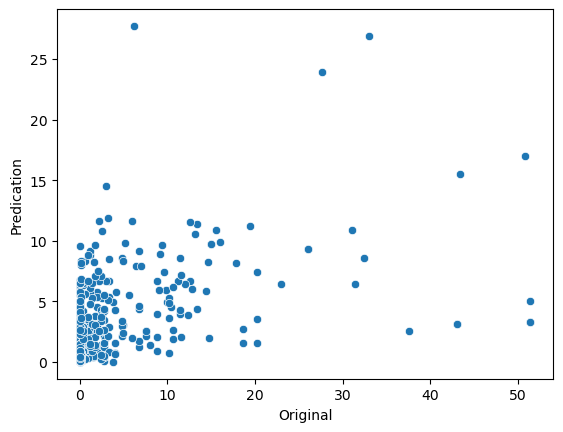

In [356]:
sns.scatterplot(x=Original,y=prediction)
plt.xlabel('Original')
plt.ylabel('Predication')